<div text-align: center;">
    <img src="https://hcphprodwebrevamp.blob.core.windows.net/hcph-website/assets/Web_Revamp_Banner_1940_x_500_67c5a14fea.jpg" alt="Image">
</div>

## <font color = #04f6ab>Projet 7 :</font> <font color = #27C3E5>Implémentez un modèle de scoring </font><img src="https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png" width="100%" height="5" />

___Inspiré par les Kernels :___

- *https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction*

- *https://www.kaggle.com/code/codename007/home-credit-complete-eda-feature-importance*

- *https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script*

#### <font color = 'green'><u>*Mission :* </u></font>

> - *Notre entreprise offre des crédits à la consommation pour les personnes ayant peu ou pas d’historique de prêt. Nous voulons créer un système pour prédire si un client > remboursera ou non son prêt en utilisant des données variées.* 
> 
> - *Nous voulons également être transparents avec nos clients sur nos décisions de prêt. Pour cela, nous allons créer un tableau de bord interactif pour que nos employés puissent expliquer les décisions de prêt et permettre aux clients de voir leurs informations personnelles.* 
> 
> - *Notre mission est de construire un système de notation et un tableau de bord interactif pour aider nos employés à comprendre les prédictions du système et à mieux connaître nos clients. Nous allons utiliser un kernel Kaggle pour préparer les données pour notre système de notation.* 
> 
> - *Le tableau de bord devra permettre aux utilisateurs de voir le score et l’interprétation du score pour chaque client, de voir des informations sur un client et de comparer ces informations avec d’autres clients.*

#### <font color = 'green'><u>*Jeu de donnés :* </u></font>

> *Les données sont fournies par ``Home Credit``, un service dédié à l'octroi de crédits (prêts) à la population non bancarisée. Prédire si un client remboursera ou non un prêt ou aura des difficultés est un besoin commercial critique, et Home Credit organise ce concours sur Kaggle pour voir quels types de modèles la communauté de l'apprentissage automatique peut développer pour les aider dans cette tâche.*
> 
> *Il y a 7 sources de données différentes :*
> 
>   - *`1- app_train/application_test :` les principales données d'entraînement et de test avec des informations sur chaque demande de prêt chez Home Credit. Chaque prêt a sa propre ligne et est identifié par la caractéristique SK_ID_CURR. Les données d'application d'entraînement sont accompagnées de la cible indiquant 0 : le prêt a été remboursé ou 1 : le prêt n'a pas été remboursé.*
>
>   - *`2- bureau :` données concernant les crédits antérieurs du client auprès d'autres institutions financières. Chaque crédit antérieur a sa propre ligne dans le bureau, mais un prêt dans les données d'application peut avoir plusieurs crédits antérieurs.*
>
>   - *`3- bureau_balance :` données mensuelles sur les crédits antérieurs dans le bureau. Chaque ligne représente un mois d'un crédit antérieur, et un seul crédit antérieur peut avoir plusieurs lignes, une pour chaque mois de la durée du crédit.*
>
>   - *`4- previous_application :` demandes de prêts antérieures chez Home Credit pour les clients ayant des prêts dans les données d'application. Chaque prêt en cours dans les données > d'application peut avoir plusieurs prêts antérieurs. Chaque demande antérieure a une ligne et est identifiée par la caractéristique SK_ID_PREV.*
>
>   - *`5- POS_CASH_BALANCE :` données mensuelles sur les précédents points de vente ou prêts en espèces que les clients ont eus avec Home Credit. Chaque ligne représente un mois d'un point de vente ou d'un prêt en espèces précédent, et un seul prêt précédent peut avoir plusieurs lignes.*
>
>   - *`6- credit_card_balance :` données mensuelles sur les cartes de crédit précédentes que les clients ont eues avec Home Credit. Chaque ligne représente un mois de solde de carte de crédit, et une seule carte de crédit peut avoir plusieurs lignes.*
>
>   - *`7- installments_payment :` historique des paiements pour les prêts précédents chez Home Credit. Il y a une ligne pour chaque paiement effectué et une ligne pour chaque paiement manqué.*
> 
> *L’organigramme ci-dessous montre tous les fichiers disponibles, leur contenu et comment ils sont liés.*

<div style="background-color: #FFFFFF; text-align: center;">
    <img src="https://camo.githubusercontent.com/3f3be3756d7c64e448345170947215744b58e70a00de556248077b1ecf397428/68747470733a2f2f73746f726167652e676f6f676c65617069732e636f6d2f6b6167676c652d6d656469612f636f6d7065746974696f6e732f686f6d652d6372656469742f686f6d655f6372656469742e706e67" alt="Image">
</div>

## <font color = ##04f6ab> I : </font> <font color = #27C3E5> importation des liberairies : </font><img src="https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png" width="100%" height="5" />

#### <font color = 'green'><u>*I.1 - Libreries :* </u></font>

In [1]:
#=========================================Supression des warnings===============================================#
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

#==================================Bibliothèques de manipulation de données=====================================#
import pandas as pd  # Pour la manipulation et l'analyse des données
import numpy as np  # Pour la manipulation des tableaux et matrices de grande taille

#==================================Bibliothèques de visualisation===============================================#
import matplotlib.pyplot as plt  # Pour créer des graphiques statiques, animés et interactifs
import seaborn as sns  # Pour créer des graphiques statistiques plus attrayants

#=================================Bibliothèques d'apprentissage automatique=====================================#
from lightgbm import LGBMClassifier  # Pour utiliser l'algorithme LightGBM
from xgboost import XGBClassifier  # Pour utiliser l'algorithme XGBoost
from sklearn import metrics # pour les métriques d'apprentissage automatique
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, RocCurveDisplay  # Pour évaluer les modèles
from sklearn.metrics import make_scorer, fbeta_score, confusion_matrix, f1_score  # Pour évaluer les modèles
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, RandomizedSearchCV, learning_curve  # Pour la sélection de modèles et la validation croisée
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler  # Pour le prétraitement des données
from sklearn.compose import make_column_transformer, ColumnTransformer  # Pour combiner plusieurs opérations de prétraitement
from sklearn.dummy import DummyClassifier  # Pour créer un classificateur de base
from sklearn.ensemble import HistGradientBoostingClassifier  # Pour utiliser l'algorithme HistGradientBoosting
from sklearn.neighbors import KNeighborsClassifier  # Pour utiliser l'algorithme K-Nearest Neighbors
from sklearn.svm import SVC  # Pour utiliser l'algorithme Support Vector Machine
from sklearn.linear_model import LogisticRegression  # Pour utiliser l'algorithme Logistic Regression
from sklearn.impute import SimpleImputer  # Pour gérer les valeurs manquantes
from imblearn.over_sampling import SMOTE  # Pour gérer le déséquilibre des classes
from imblearn.under_sampling import RandomUnderSampler # Pour gérer le déséquilibre des classes
from imblearn.pipeline import Pipeline  # Pour créer des pipelines avec imblearn
from imblearn.combine import SMOTETomek # pour gérer le déséquilibre des classes
from collections import Counter  # Pour compter les valeurs d'une liste
import mlflow  # Pour suivre et gérer les expériences d'apprentissage automatique
import shap  # Pour expliquer les sorties des modèles d'apprentissage automatique

#=================================Bibliothèques pour les tests et les rapports====================================#
from evidently.test_suite import TestSuite  # Pour créer des suites de tests
from evidently.test_preset import DataStabilityTestPreset  # Pour tester la stabilité des données
from evidently.report import Report  # Pour créer des rapports
from evidently.metric_preset import DataDriftPreset  # Pour détecter le dérive des données
from evidently.report import Report  # Pour créer des rapports
from evidently.metrics import DataDriftTable, DatasetDriftMetric # Pour détecter le dérive des données

#===================================Autres bibliothèques===========================================================#
import gc  # Pour la gestion de la mémoire
import time  # Pour gérer le temps
import re  # Pour les expressions régulières
import os  # Pour gérer les fichiers et répertoires
from os.path import exists # Pour vérifier si un fichier existe
from contextlib import contextmanager  # Pour la gestion du contexte
from joblib import dump  # Pour la sérialisation et la désérialisation
import pickle  # Pour la sérialisation et la désérialisation
import joblib  # Pour la sérialisation et la désérialisation

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


## <font color = ##04f6ab> II : </font> <font color = #27C3E5> Chargement et analyse des données </font><img src="https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png" width="100%" height="5" />

#### <font color = 'green'><u>*II.1 - Chargement jeu de données :* </u></font>

In [2]:
# Afficher les fichiers dans le répertoire
display(os.listdir("DATA_Home_Credit"))

['application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'sample_submission.csv']

`application_{train|test}.csv` :
This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET). Static data for all applications. One row represents one loan in our data sample.

`bureau.csv` :
All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample). For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

`bureau_balance.csv` :
Monthly balances of previous credits in Credit Bureau. This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

`POS_CASH_balance.csv` :
Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit. This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

`credit_card_balance.csv` :
Monthly balance snapshots of previous credit cards that the applicant has with Home Credit. This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

`previous_application.csv` :
All previous applications for Home Credit loans of clients who have loans in our sample. There is one row for each previous application related to loans in our data sample.

`installments_payments.csv` :
Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample. There is a) one row for every payment that was made plus b) one row each for missed payment. One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

`HomeCredit_columns_description.csv` :
This file contains descriptions for the columns in the various data files.

In [3]:
app_train = pd.read_csv('DATA_Home_Credit/application_train.csv')
pos_ca = pd.read_csv('DATA_Home_Credit/POS_CASH_balance.csv')
bureau_bal = pd.read_csv('DATA_Home_Credit/bureau_balance.csv')
prev_app = pd.read_csv('DATA_Home_Credit/previous_application.csv')
ins_pay = pd.read_csv('DATA_Home_Credit/installments_payments.csv')
cre_card = pd.read_csv('DATA_Home_Credit/credit_card_balance.csv')
bur = pd.read_csv('DATA_Home_Credit/bureau.csv')
app_test = pd.read_csv('DATA_Home_Credit/application_test.csv')
home_credit = pd.read_csv('DATA_Home_Credit/HomeCredit_columns_description.csv', encoding = 'latin-1')

In [4]:
print('Size of app_train data', app_train.shape)
print('Size of POS_CASH_balance data', pos_ca.shape)
print('Size of bureau_balance data', bureau_bal.shape)
print('Size of previous_application data', prev_app.shape)
print('Size of installments_payments data', ins_pay.shape)
print('Size of credit_card_balance data', cre_card.shape)
print('Size of bureau data', bur.shape)

Size of app_train data (307511, 122)
Size of POS_CASH_balance data (10001358, 8)
Size of bureau_balance data (27299925, 3)
Size of previous_application data (1670214, 37)
Size of installments_payments data (13605401, 8)
Size of credit_card_balance data (3840312, 23)
Size of bureau data (1716428, 17)


In [5]:
# Training data
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

*The training data has 307511 observations (each one a separate loan) and 122 features (variables) including the TARGET (the label we want to predict).*

In [6]:
# Testing data features
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

*The test set is considerably smaller and lacks a TARGET column.*

#### <font color = 'green'><u>*II.2 - Examine the Distribution of the Target Column :* </u></font>

*The target is what we are asked to predict: either a 0 for the loan was repaid on time, or a 1 indicating the client had payment difficulties. We can first examine the number of loans falling into each category.*

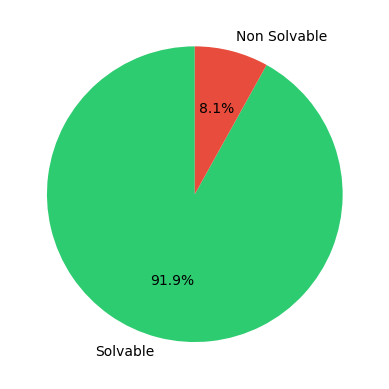

In [7]:
def solvability_clients(df):
    """
    Pieplot de la solvabilité clients
    df(pd.DataFrame): jeu de données
    """
    # % de valeurs 'TARGET' différentes
    target_values = df['TARGET'].value_counts()/len(df)*100
    # Pieplot du % de chaque valeurs différentes de 'TARGET'
    plt.pie(target_values,
            colors=['#2ecc71', '#e74c3c'],
            autopct='%1.1f%%',
            labels=["Solvable", "Non Solvable"],
            startangle=90)
    plt.show()
    
# Pieplot solvabilité clients du jeu d'entrainement
solvability_clients(app_train)

*Nous constatons que c’est un problème de classe déséquilibrée. Il y a beaucoup plus de prêts qui ont été remboursés à temps que de prêts qui n’ont pas été remboursés. Lorsque nous abordons des modèles d’apprentissage automatique plus sophistiqués, nous pouvons pondérer les classes en fonction de leur représentation dans les données pour refléter ce déséquilibre.*

#### <font color = 'green'><u>*II.3 - Examine Missing Values and correlations :* </u></font>

In [8]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

- *checking missing data in app_train*

In [9]:
# Missing values statistics
missing_values_table(app_train)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
...                                  ...                ...
EXT_SOURCE_2                         660                0.2
AMT_GOODS_PRICE                      278                0.1
AMT_ANNUITY                           12                0.0
CNT_FAM_MEMBERS                        2                0.0
DAYS_LAST_PHONE_CHANGE                 1                0.0

[67 rows x 2 columns]

- *check des outliers*

In [10]:
app_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [11]:
(app_train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [12]:
(app_train['DAYS_EMPLOYED']/ 365).describe()

count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

In [13]:
app_train.loc[app_train['DAYS_EMPLOYED'] > 300000, 'DAYS_EMPLOYED'].describe()

count     55374.0
mean     365243.0
std           0.0
min      365243.0
25%      365243.0
50%      365243.0
75%      365243.0
max      365243.0
Name: DAYS_EMPLOYED, dtype: float64

Nous remplaçons la valeur aberrante 365 243 par np.nan.

In [14]:
app_train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)

In [15]:
app_train['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

Nous supprimons les 4 lignes qui ont XNA pour CODE_GENDER.

In [16]:
app_train = app_train[app_train['CODE_GENDER'] != 'XNA']

- Corrélations
   - 0-0.19 "très faible"
   - 0.2-0.39 "faible"
   - 0.4-0.59 "modéré"
   - 0.6-0.79 "fort"
   - 0.8-1 "très fort"

In [17]:
# calcule des correlations positives entre les variables et la variable TARGET
correlations = app_train[app_train.select_dtypes(['int','float']).columns.to_list()].corr()['TARGET'].sort_values(ascending = False)

# Les 10 plus importantes corrélations positives
print('-------Les 10 plus importantes corrélations positives--------')
print(correlations.head(10))
print('\n-------Les 10 plus importantes corrélations négatives-------')
# Les 10 plus importantes corrélations négatives
print(correlations.tail(10))
print('\n-------Les 10 plus importantes corrélations---------------')
# Les 10 plus importantes corrélations
(abs(correlations)).sort_values(ascending = False).head(10)

-------Les 10 plus importantes corrélations positives--------
TARGET                         1.000000
DAYS_BIRTH                     0.078242
DAYS_EMPLOYED                  0.074957
REGION_RATING_CLIENT_W_CITY    0.060895
REGION_RATING_CLIENT           0.058901
DAYS_LAST_PHONE_CHANGE         0.055219
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050992
FLAG_EMP_PHONE                 0.045984
REG_CITY_NOT_LIVE_CITY         0.044394
Name: TARGET, dtype: float64

-------Les 10 plus importantes corrélations négatives-------
ELEVATORS_MEDI               -0.033866
ELEVATORS_AVG                -0.034202
REGION_POPULATION_RELATIVE   -0.037225
AMT_GOODS_PRICE              -0.039647
FLOORSMAX_MODE               -0.043231
FLOORSMAX_MEDI               -0.043773
FLOORSMAX_AVG                -0.044009
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160471
EXT_SOURCE_3                 -0.178926
Name: TARGET, dtype: float64

-------Les 10 plus importan

TARGET                         1.000000
EXT_SOURCE_3                   0.178926
EXT_SOURCE_2                   0.160471
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078242
DAYS_EMPLOYED                  0.074957
REGION_RATING_CLIENT_W_CITY    0.060895
REGION_RATING_CLIENT           0.058901
DAYS_LAST_PHONE_CHANGE         0.055219
DAYS_ID_PUBLISH                0.051457
Name: TARGET, dtype: float64

- Les trois facteurs numériques les plus déterminants proviennent de sources externes.
 
- Le facteur ‘DAYS_BIRTH’ et 'DAYS_EMPLOYED'. Prenons le temps de les examiner attentivement.

In [18]:
df_age = app_train[['TARGET', 'DAYS_BIRTH']].copy()
df_age['YEARS_BIRTH'] = df_age['DAYS_BIRTH']/-365
df_age['Tranche_age'] = pd.cut(df_age['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
df_age.head()

TARGET  DAYS_BIRTH  YEARS_BIRTH   Tranche_age
0       1       -9461    25.920548  (25.0, 30.0]
1       0      -16765    45.931507  (45.0, 50.0]
2       0      -19046    52.180822  (50.0, 55.0]
3       0      -19005    52.068493  (50.0, 55.0]
4       0      -19932    54.608219  (50.0, 55.0]

In [19]:
age_groupe = df_age.groupby('Tranche_age').mean()
age_groupe

TARGET    DAYS_BIRTH  YEARS_BIRTH
Tranche_age                                      
(20.0, 25.0]  0.123036  -8532.795625    23.377522
(25.0, 30.0]  0.111442 -10155.219690    27.822520
(30.0, 35.0]  0.102814 -11854.848377    32.479037
(35.0, 40.0]  0.089416 -13707.908041    37.555912
(40.0, 45.0]  0.078491 -15497.661233    42.459346
(45.0, 50.0]  0.074171 -17323.900441    47.462741
(50.0, 55.0]  0.066968 -19196.494791    52.593136
(55.0, 60.0]  0.055316 -20984.285455    57.491193
(60.0, 65.0]  0.052737 -22780.547460    62.412459
(65.0, 70.0]  0.037270 -24292.614340    66.555108

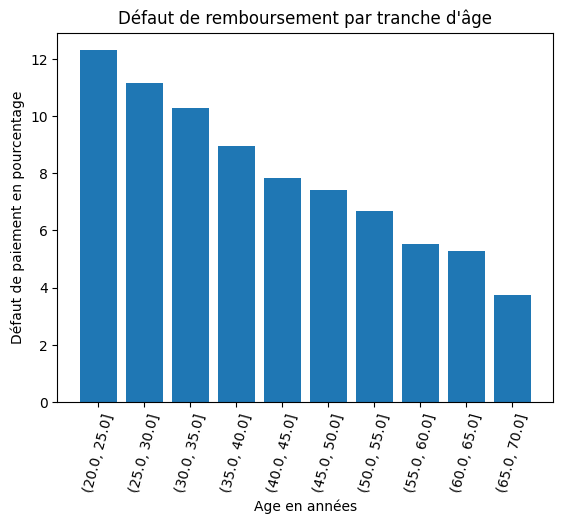

In [20]:
plt.bar(age_groupe.index.astype(str), age_groupe['TARGET']*100)
plt.title('Défaut de remboursement par tranche d\'âge')
plt.xlabel('Age en années')
plt.ylabel('Défaut de paiement en pourcentage')
plt.xticks(rotation = 75)
plt.show()

- Il est évident que le risque de non-paiement augmente avec la jeunesse des clients.

In [21]:
df_emp = app_train[['TARGET', 'DAYS_EMPLOYED']].copy()
df_emp['YEARS_EMP'] = df_emp['DAYS_EMPLOYED']/-365
df_emp['Tranche_age'] = pd.cut(df_emp['YEARS_EMP'], bins = np.linspace(0, 50, num = 11))
df_emp.head()

TARGET  DAYS_EMPLOYED  YEARS_EMP  Tranche_age
0       1         -637.0   1.745205   (0.0, 5.0]
1       0        -1188.0   3.254795   (0.0, 5.0]
2       0         -225.0   0.616438   (0.0, 5.0]
3       0        -3039.0   8.326027  (5.0, 10.0]
4       0        -3038.0   8.323288  (5.0, 10.0]

In [22]:
emp_groupe = df_emp.groupby('Tranche_age').mean()
emp_groupe

TARGET  DAYS_EMPLOYED  YEARS_EMP
Tranche_age                                     
(0.0, 5.0]    0.105709    -864.338095   2.368050
(5.0, 10.0]   0.073717   -2630.227316   7.206102
(10.0, 15.0]  0.057752   -4466.899670  12.238081
(15.0, 20.0]  0.048484   -6306.860448  17.279070
(20.0, 25.0]  0.047573   -8092.875701  22.172262
(25.0, 30.0]  0.039915   -9961.412156  27.291540
(30.0, 35.0]  0.041258  -11791.751418  32.306168
(35.0, 40.0]  0.019231  -13517.634615  37.034615
(40.0, 45.0]  0.004762  -15325.461905  41.987567
(45.0, 50.0]  0.000000  -16862.916667  46.199772

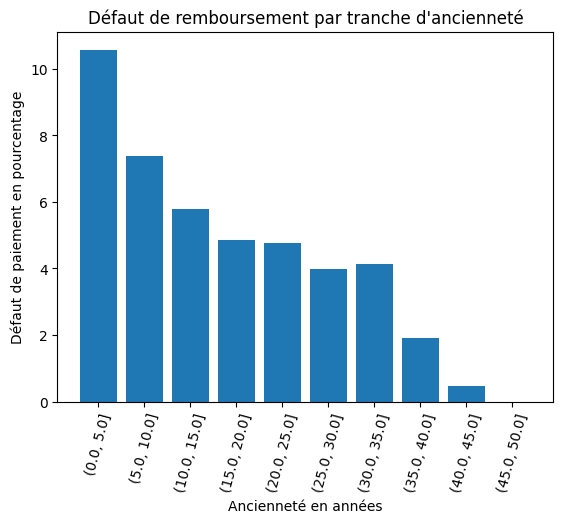

In [23]:
plt.bar(emp_groupe.index.astype(str), emp_groupe['TARGET']*100)
plt.title('Défaut de remboursement par tranche d\'ancienneté')
plt.xlabel('Ancienneté en années')
plt.ylabel('Défaut de paiement en pourcentage')
plt.xticks(rotation = 75)
plt.show()

- Il est manifeste que plus un client est ancien, moins il y a de risques de défaut de paiement, ce qui est en accord avec notre analyse précédente sur l’âge.

Ensuite, nous avons les variabes 'REGION_RATING_CLIENT' et 'REGION_RATING_CLIENT_W_CITY' qui donnent un score de localisation : 1, 2 ou 3.

In [24]:
app_train['REGION_RATING_CLIENT'].value_counts()

REGION_RATING_CLIENT
2    226981
3     48329
1     32197
Name: count, dtype: int64

In [25]:
app_train['REGION_RATING_CLIENT_W_CITY'].value_counts()

REGION_RATING_CLIENT_W_CITY
2    229481
3     43859
1     34167
Name: count, dtype: int64

In [26]:
app_train.loc[app_train['REGION_RATING_CLIENT'] != app_train['REGION_RATING_CLIENT_W_CITY'], 'TARGET'].value_counts(normalize = True)

TARGET
0    0.925848
1    0.074152
Name: proportion, dtype: float64

- Il existe seulement 5 718 demandes où les deux scores diffèrent. La distribution des cibles est la même que celle de l’ensemble du jeu de données, avec 92% de zéros.

In [27]:
df_emp = app_train[['TARGET', 'DAYS_LAST_PHONE_CHANGE']].copy()
df_emp['YEARS_PHONE'] = df_emp['DAYS_LAST_PHONE_CHANGE']/-365
df_emp['Tranche_annee'] = pd.cut(df_emp['YEARS_PHONE'], bins = np.linspace(0, 11, num = 12))
df_emp.head()

TARGET  DAYS_LAST_PHONE_CHANGE  YEARS_PHONE Tranche_annee
0       1                 -1134.0     3.106849    (3.0, 4.0]
1       0                  -828.0     2.268493    (2.0, 3.0]
2       0                  -815.0     2.232877    (2.0, 3.0]
3       0                  -617.0     1.690411    (1.0, 2.0]
4       0                 -1106.0     3.030137    (3.0, 4.0]

In [28]:
phone_groupe = df_emp.groupby('Tranche_annee').mean()
phone_groupe

TARGET  DAYS_LAST_PHONE_CHANGE  YEARS_PHONE
Tranche_annee                                               
(0.0, 1.0]     0.095164             -174.553078     0.478228
(1.0, 2.0]     0.092971             -541.597310     1.483828
(2.0, 3.0]     0.082693             -900.556251     2.467277
(3.0, 4.0]     0.070667            -1272.487454     3.486267
(4.0, 5.0]     0.064304            -1635.270771     4.480194
(5.0, 6.0]     0.060417            -1983.494928     5.434233
(6.0, 7.0]     0.056280            -2368.500922     6.489044
(7.0, 8.0]     0.054142            -2705.349693     7.411917
(8.0, 9.0]     0.045086            -3092.611164     8.472907
(9.0, 10.0]    0.045936            -3405.477032     9.330074
(10.0, 11.0]   0.046632            -3765.668394    10.316900

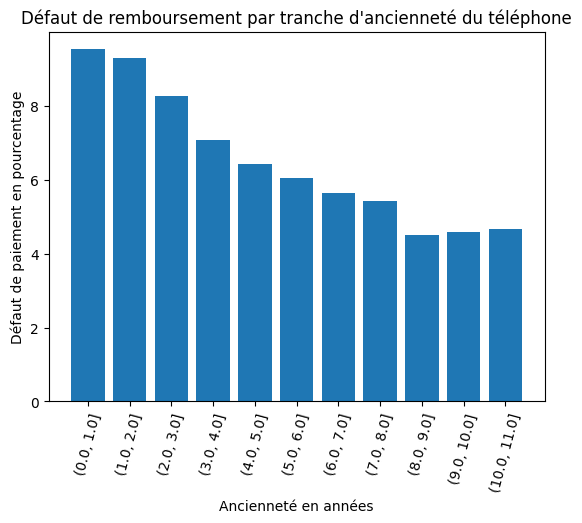

In [29]:
plt.bar(phone_groupe.index.astype(str), phone_groupe['TARGET']*100)
plt.title('Défaut de remboursement par tranche d\'ancienneté du téléphone')
plt.xlabel('Ancienneté en années')
plt.ylabel('Défaut de paiement en pourcentage')
plt.xticks(rotation = 75)
plt.show()

- Il est clair que plus un téléphone est ancien, moins il y a de risques de défaut de paiement.

In [30]:
bureau_bal['STATUS'].value_counts()

STATUS
C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: count, dtype: int64

In [31]:
bureau_bal.loc[bureau_bal['SK_ID_BUREAU'] == 5715448]

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0        5715448               0      C
1        5715448              -1      C
2        5715448              -2      C
3        5715448              -3      C
4        5715448              -4      C
5        5715448              -5      C
6        5715448              -6      C
7        5715448              -7      C
8        5715448              -8      C
9        5715448              -9      0
10       5715448             -10      0
11       5715448             -11      X
12       5715448             -12      X
13       5715448             -13      X
14       5715448             -14      0
15       5715448             -15      0
16       5715448             -16      0
17       5715448             -17      0
18       5715448             -18      0
19       5715448             -19      0
20       5715448             -20      X
21       5715448             -21      X
22       5715448             -22      X
23       5715448             -23      X
24       5715448             -24      X
25       5715448             -25      X
26       5715448             -26      X

MONTHS_BALANCE représente le mois du solde par rapport à la date d'application (-1 signifie la date de solde la plus récente)

STATUS :
   - C signifie fermé
   - X signifie état inconnu
   - 0 signifie pas de DPD (days past due -> jours de retard au cours du mois précédent)
   - 1 signifie DPD entre 1-30
   - 2 signifie DPD 31-60
   - 5 signifie DPD 120+ ou vendu ou radié

*Let's now look at the number of unique entries in each of the object (categorical) columns.*

In [32]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [33]:
# Number of unique classes in each object column
app_test.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

*Most of the categorical variables have a relatively small number of unique entries. We will need to find a way to deal with these categorical variables!*

## <font color = ##04f6ab> III : </font> <font color = #27C3E5> Feature engineering </font><img src="https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png" width="100%" height="5" />

#### <font color = 'green'><u>*III.1 - Fonctions :* </u></font>

In [34]:
def one_hot_encoder(df, nan_as_category = True):
    '''Encodage des variables catégorielles.
    Keyword arguments:
    df -- dataframe
    nan_as_category -- ajout d'une colonne indiquant les NaN (default True)
    Returns:
    df -- dataframe encodé
    new_columns -- nouvelles colonnes créées par l'encodage.
    '''
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, dtype=int)
    new_columns = [c for c in df.columns if c not in original_columns]
    
    return df, new_columns

def application_train_test(num_rows = None, nan_as_category = False):
    '''Preprocessing de application_train.csv et application_test.csv.
    Keyword arguments:
    num_rows -- nombre de lignes (default None)
    nan_as_category -- ajout d'une colonne indiquant les NaN (default False)
    Returns:
    df -- dataframe mergé et preprocessing réalisé.
    '''
    # Read data and merge
    df = pd.read_csv('DATA_Home_Credit/application_train.csv', nrows= num_rows)
    df_test = pd.read_csv('DATA_Home_Credit/application_test.csv', nrows= num_rows)
    print("Taille des données d'entrainement: {}, Taille des données de test: {}".format(len(df), len(df_test)))
    df = pd.concat([df,df_test], ignore_index=True)
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']
    
    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)
    
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

    del df_test
    gc.collect()
    
    return df

def bureau_and_balance(num_rows = None, nan_as_category = True):
    '''Preprocessing de bureau.csv et bureau_balance.csv.
    Keyword arguments:
    num_rows -- nombre de lignes (default None)
    nan_as_category -- ajout d'une colonne indiquant les NaN (default True)
    Returns:
    bureau_agg -- dataframe aggregé et preprocessing réalisé.
    '''
    bureau = pd.read_csv('DATA_Home_Credit/bureau.csv', nrows = num_rows)
    bb = pd.read_csv('DATA_Home_Credit/bureau_balance.csv', nrows = num_rows)
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
    
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()
    
    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    
    return bureau_agg

def previous_applications(num_rows = None, nan_as_category = True):
    '''Preprocessing de previous_applications.csv.
    Keyword arguments:
    num_rows -- nombre de lignes (default None)
    nan_as_category -- ajout d'une colonne indiquant les NaN (default True)
    Returns:
    prev_agg -- dataframe aggregé et preprocessing réalisé.
    '''
    prev = pd.read_csv('DATA_Home_Credit/previous_application.csv', nrows = num_rows)
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']
    
    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    
    return prev_agg

def pos_cash(num_rows = None, nan_as_category = True):
    '''Preprocessing de POS_CASH_balance.csv.
    Keyword arguments:
    num_rows -- nombre de lignes (default None)
    nan_as_category -- ajout d'une colonne indiquant les NaN (default True)
    Returns:
    pos_agg -- dataframe aggregé et preprocessing réalisé.
    '''
    pos = pd.read_csv('DATA_Home_Credit/POS_CASH_balance.csv', nrows = num_rows)
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)
    
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    
    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    
    return pos_agg
    
def installments_payments(num_rows = None, nan_as_category = True):
    '''Preprocessing de installments_payments.csv.
    Keyword arguments:
    num_rows -- nombre de lignes (default None)
    nan_as_category -- ajout d'une colonne indiquant les NaN (default True)
    Returns:
    ins_agg -- dataframe aggregé et preprocessing réalisé.
    '''
    ins = pd.read_csv('DATA_Home_Credit/installments_payments.csv', nrows = num_rows)
    ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)
    
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    
    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    
    return ins_agg

def credit_card_balance(num_rows = None, nan_as_category = True):
    '''Preprocessing de credit_card_balance.csv.
    Keyword arguments:
    num_rows -- nombre de lignes (default None)
    nan_as_category -- ajout d'une colonne indiquant les NaN (default True)
    Returns:
    cc_agg -- dataframe aggregé et preprocessing réalisé.
    '''
    cc = pd.read_csv('DATA_Home_Credit/credit_card_balance.csv', nrows = num_rows)
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)
    
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    
    return cc_agg

#### <font color = 'green'><u>*III.2 - Merging :* </u></font>

In [35]:
num_rows = None 
df = application_train_test(num_rows)

bureau = bureau_and_balance(num_rows)
print("Bureau df shape:", bureau.shape)
df = df.join(bureau, how="left", on="SK_ID_CURR")
del bureau
gc.collect()

prev = previous_applications(num_rows)
print("Previous applications df shape:", prev.shape)
df = df.join(prev, how="left", on="SK_ID_CURR")
del prev
gc.collect()

pos = pos_cash(num_rows)
print("Pos-cash balance df shape:", pos.shape)
df = df.join(pos, how="left", on="SK_ID_CURR")
del pos
gc.collect()

ins = installments_payments(num_rows)
print("Installments payments df shape:", ins.shape)
df = df.join(ins, how="left", on="SK_ID_CURR")
del ins
gc.collect()

cc = credit_card_balance(num_rows)
print("Credit card balance df shape:", cc.shape)
df = df.join(cc, how="left", on="SK_ID_CURR")

del cc
gc.collect()

Taille des données d'entrainement: 307511, Taille des données de test: 48744
Bureau df shape: (305811, 116)
Previous applications df shape: (338857, 249)
Pos-cash balance df shape: (337252, 18)
Installments payments df shape: (339587, 26)
Credit card balance df shape: (103558, 141)


0

In [36]:
df.shape

(356251, 797)

In [37]:
df_train = df[df['TARGET'].notnull()]
df_test = df[df['TARGET'].isnull()]
print("Taille des données d'entrainement: {}".format(len(df_train)))
print("Taille des données de test: {}".format(len(df_test)))

Taille des données d'entrainement: 307507
Taille des données de test: 48744


In [38]:
import os

if not os.path.isfile('models/df_train.csv'):
    df_train.to_csv('models/df_train.csv', index = False)
else:
    print("Le fichier 'df_train.csv' existe déjà.")

if not os.path.isfile('models/df_test.csv'):
    df_test.to_csv('models/df_test.csv', index = False)
else:
    print("Le fichier 'df_test.csv' existe déjà.")


Le fichier 'df_train.csv' existe déjà.
Le fichier 'df_test.csv' existe déjà.


- Nous mettons en place un seuil au-delà duquel c'est une colonne présente plus 50% de valeurs manquantes, nous préférons la supprimer.

In [39]:
NA_sum = (
    pd.DataFrame(df_train.isna().sum(), columns=["NA_sum"])
    .sort_values(by="NA_sum", ascending=False)
    .apply(lambda x: round(x / df_train.shape[0] * 100, 2))
)
NA_sum

NA_sum
REFUSED_AMT_DOWN_PAYMENT_MAX     85.31
REFUSED_AMT_DOWN_PAYMENT_MEAN    85.31
REFUSED_AMT_DOWN_PAYMENT_MIN     85.31
REFUSED_RATE_DOWN_PAYMENT_MEAN   85.31
REFUSED_RATE_DOWN_PAYMENT_MAX    85.31
...                                ...
ORGANIZATION_TYPE_Government      0.00
ORGANIZATION_TYPE_Emergency       0.00
ORGANIZATION_TYPE_Electricity     0.00
ORGANIZATION_TYPE_Culture         0.00
SK_ID_CURR                        0.00

[797 rows x 1 columns]

In [40]:
NA_sum[NA_sum["NA_sum"] > 50]

NA_sum
REFUSED_AMT_DOWN_PAYMENT_MAX     85.31
REFUSED_AMT_DOWN_PAYMENT_MEAN    85.31
REFUSED_AMT_DOWN_PAYMENT_MIN     85.31
REFUSED_RATE_DOWN_PAYMENT_MEAN   85.31
REFUSED_RATE_DOWN_PAYMENT_MAX    85.31
...                                ...
ENTRANCES_MEDI                   50.35
ENTRANCES_AVG                    50.35
LIVINGAREA_MODE                  50.19
LIVINGAREA_MEDI                  50.19
LIVINGAREA_AVG                   50.19

[236 rows x 1 columns]

In [41]:
# on stocke les variables à supprimer dans un array
features = NA_sum[NA_sum["NA_sum"] > 50].index.to_list()
features_to_drop = [feature for feature in features if feature != 'TARGET']

In [42]:
df_train.drop(columns=features_to_drop, inplace=True, errors="ignore")

In [43]:
df_train.shape

(307507, 561)

In [44]:
df_test.shape

(48744, 797)

- On garde que les columns deja choisis sur df_train pour df_test

In [45]:
df_test = df_test[df_train.columns]
print(df_test.shape)

(48744, 561)


- Autre transformations :

In [46]:
# change les valeurs négatives en valeurs positives.
df_train[df_train.columns[(df_train < 0).any()].tolist()] = df_train[
    df_train.columns[(df_train < 0).any()].tolist()]*-1

df_test[df_test.columns[(df_test < 0).any()].tolist()] = df_test[
    df_test.columns[(df_test < 0).any()].tolist()]*-1

# Days_Birth en année
df_train['DAYS_BIRTH'] = df_train['DAYS_BIRTH']/-365
df_test['DAYS_BIRTH'] = df_test['DAYS_BIRTH']/-365

# type de days_id_publish en float
df_train['DAYS_ID_PUBLISH'] = df_train['DAYS_ID_PUBLISH'].astype(float)
df_test['DAYS_ID_PUBLISH'] = df_test['DAYS_ID_PUBLISH'].astype(float)

# Transformons notre variable *'TARGET'* en entier et supprimons cette variable de notre test set.
df_train['TARGET'] = df_train['TARGET'].astype(int)
df_test = df_test.drop('TARGET',axis=1)

# Remplacons désormais les valeurs infinies par NaN avant de procéder à une imputation.
df_train = df_train.replace(np.inf, np.nan)
df_test = df_test.replace(np.inf, np.nan)

# Nous devons retirer les caractères spéciaux des noms des features pour l'utilisation de certains modèles (LightGBM)
import re
df_train = df_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df_test = df_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

- Imputons désormais nos données:

        - Pour commencer, nous allons remplacer les valeurs manquantes des colonnes issues de l’agrégation par 0.0. 
        - Ensuite, pour les autres variables quantitatives, nous utiliserons la médiane comme valeur de remplacement. 
        - Enfin, pour les variables qualitatives ou catégorielles, nous utiliserons (le mode) la valeur la plus courante, comme valeur de remplacement.

In [47]:
df_train.dtypes.value_counts()

float64    387
int32      134
int64       40
Name: count, dtype: int64

In [48]:
df_train.select_dtypes(['int64', 'int32']).describe()

SK_ID_CURR        TARGET    CODE_GENDER   FLAG_OWN_CAR  \
count  307507.000000  307507.00000  307507.000000  307507.000000   
mean   278181.527256       0.08073       0.658352       0.340106   
std    102790.132982       0.27242       0.474263       0.473745   
min    100002.000000       0.00000       0.000000       0.000000   
25%    189146.500000       0.00000       0.000000       0.000000   
50%    278203.000000       0.00000       1.000000       0.000000   
75%    367143.500000       0.00000       1.000000       1.000000   
max    456255.000000       1.00000       1.000000       1.000000   

       FLAG_OWN_REALTY   CNT_CHILDREN     FLAG_MOBIL  FLAG_EMP_PHONE  \
count    307507.000000  307507.000000  307507.000000   307507.000000   
mean          0.306331       0.417047       0.999997        0.819887   
std           0.460970       0.722119       0.001803        0.384282   
min           0.000000       0.000000       0.000000        0.000000   
25%           0.000000       0.000000       1.000000        1.000000   
50%           0.000000       0.000000       1.000000        1.000000   
75%           1.000000       1.000000       1.000000        1.000000   
max           1.000000      19.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE  ...  HOUSETYPE_MODE_terracedhouse  \
count    307507.000000     307507.000000  ...                 307507.000000   
mean          0.199358          0.998133  ...                      0.003941   
std           0.399518          0.043164  ...                      0.062657   
min           0.000000          0.000000  ...                      0.000000   
25%           0.000000          1.000000  ...                      0.000000   
50%           0.000000          1.000000  ...                      0.000000   
75%           0.000000          1.000000  ...                      0.000000   
max           1.000000          1.000000  ...                      1.000000   

       WALLSMATERIAL_MODE_Block  WALLSMATERIAL_MODE_Mixed  \
count             307507.000000             307507.000000   
mean                   0.030090                  0.007466   
std                    0.170836                  0.086086   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  0.000000   
max                    1.000000                  1.000000   

       WALLSMATERIAL_MODE_Monolithic  WALLSMATERIAL_MODE_Others  \
count                  307507.000000              307507.000000   
mean                        0.005785                   0.005284   
std                         0.075841                   0.072502   
min                         0.000000                   0.000000   
25%                         0.000000                   0.000000   
50%                         0.000000                   0.000000   
75%                         0.000000                   0.000000   
max                         1.000000                   1.000000   

       WALLSMATERIAL_MODE_Panel  WALLSMATERIAL_MODE_Stonebrick  \
count             307507.000000                  307507.000000   
mean                   0.214756                       0.210769   
std                    0.410654                       0.407855   
min                    0.000000                       0.000000   
25%                    0.000000                       0.000000   
50%                    0.000000                       0.000000   
75%                    0.000000                       0.000000   
max                    1.000000                       1.000000   

       WALLSMATERIAL_MODE_Wooden  EMERGENCYSTATE_MODE_No  \
count              307507.000000           307507.000000   
mean                    0.017437                0.518443   
std                     0.130893                0.499661   
min                     0.000000               

In [49]:
df_train.select_dtypes(['float64']).describe()

AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count      3.075070e+05  3.075070e+05  307495.000000     3.072290e+05   
mean       1.687977e+05  5.990286e+05   27108.666786     5.383977e+05   
std        2.371246e+05  4.024926e+05   14493.798379     3.694472e+05   
min        2.565000e+04  4.500000e+04    1615.500000     4.050000e+04   
25%        1.125000e+05  2.700000e+05   16524.000000     2.385000e+05   
50%        1.471500e+05  5.135310e+05   24903.000000     4.500000e+05   
75%        2.025000e+05  8.086500e+05   34596.000000     6.795000e+05   
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307507.000000  307507.000000  252133.000000   
mean                     0.020868     -43.937061    2384.142254   
std                      0.013831      11.956116    2338.327666   
min                      0.000290     -69.120548      -0.000000   
25%                      0.010006     -53.923288     767.000000   
50%                      0.018850     -43.150685    1648.000000   
75%                      0.028663     -34.008219    3175.000000   
max                      0.072508     -20.517808   17912.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  ...  \
count      307507.000000    307507.000000    307505.000000  ...   
mean         4986.131376      2994.201670         2.152658  ...   
std          3522.883030      1509.454566         0.910680  ...   
min            -0.000000         0.000000         1.000000  ...   
25%          2010.000000      1720.000000         2.000000  ...   
50%          4504.000000      3254.000000         2.000000  ...   
75%          7479.500000      4299.000000         3.000000  ...   
max         24672.000000      7197.000000        20.000000  ...   

       INSTAL_AMT_INSTALMENT_MEAN  INSTAL_AMT_INSTALMENT_SUM  \
count                2.916390e+05               2.916390e+05   
mean                 1.839265e+04               6.724082e+05   
std                  2.333812e+04               8.800793e+05   
min                  0.000000e+00               0.000000e+00   
25%                  7.799488e+03               1.346724e+05   
50%                  1.257269e+04               3.283601e+05   
75%                  2.137614e+04               8.432570e+05   
max                  2.504590e+06               2.327473e+07   

       INSTAL_AMT_PAYMENT_MIN  INSTAL_AMT_PAYMENT_MAX  \
count            2.916310e+05            2.916310e+05   
mean             5.198161e+03            1.381797e+05   
std              1.442461e+04            2.477894e+05   
min              0.000000e+00            2.250000e-01   
25%              4.099500e+01            1.409710e+04   
50%              2.314800e+03            3.600000e+04   
75%              7.105792e+03            1.329875e+05   
max              2.504590e+06            3.771488e+06   

       INSTAL_AMT_PAYMENT_MEAN  INSTAL_AMT_PAYMENT_SUM  \
count             2.916310e+05            2.916390e+05   
mean              1.875436e+04            6.785789e+05   
std               2.510551e+04            9.161592e+05   
min               1.890000e-01            0.000000e+00   
25%               7.478245e+03            1.308246e+05   
50%               1.222584e+04            3.186101e+05   
75%               2.135286e+04            8.330939e+05   
max               2.504590e+06            2.553705e+07   

       INSTAL_DAYS_ENTRY_PAYMENT_MAX  INSTAL_DAYS_ENTRY_PAYMENT_MEAN  \
count                  291631.000000                   291631.000000   
mean                      327.788394                      920.959958   
std                       536.870886                      597.028286   
min                         1.000000                        3.000000   
25%                        26.000000                      431.609226   
50%                        66.000000                      807.574468   
75%                    

In [50]:
quanti_col = df_train.select_dtypes(['float64']).columns
quali_col = df_train.select_dtypes(['int64', 'int32']).columns
quali_col = quali_col.drop('TARGET')

# imputation des variables quantitatives issues de l'aggrégation
col_agg = df_train.columns[df_train.columns.str.contains('_MIN|_MAX|_MEAN|_VAR|_SUM|_SIZE')]

df_train[col_agg] = df_train[col_agg].fillna(0.0)
df_test[col_agg] = df_test[col_agg].fillna(0.0)

# imputation des variables quantitatives restantes
quanti_col_rest = [col for col in quanti_col if col not in col_agg]
for col in quanti_col_rest:
    median = df_train[col].median()
    df_train[col] = df_train[col].fillna(median)
    df_test[col] = df_test[col].fillna(median)

# imputation des variables qualitatives
for col in quali_col:
    mode = df_train[col].mode()[0]
    df_train[col] = df_train[col].fillna(mode)
    df_test[col] = df_test[col].fillna(mode)

- Verification de l'imputation

In [51]:
def missing_general(df):
    total_cells = np.product(df.shape)
    missing_cells = df.isnull().sum().sum()
    missing_percent = (missing_cells / total_cells) * 100
    print('Nombre total de cellules manquantes :', missing_cells)
    print('Nombre de cellules manquantes en % : {:.2f}%'.format(missing_percent))

print('Le dataset train :')
missing_general(df_train)
print()
print('Le dataset test :')
missing_general(df_test)

Le dataset train :
Nombre total de cellules manquantes : 0
Nombre de cellules manquantes en % : 0.00%

Le dataset test :
Nombre total de cellules manquantes : 0
Nombre de cellules manquantes en % : 0.00%


#### <font color = 'green'><u>*III.2 - Sélection des features / réduction des dimensions :* </u></font>

Nous faisons face à un problème stratégique :

+ Nous avons plus de *300,000 individus*
+ Nous avons plus de *560 variables*

Deux options sont possibles (et ne sont pas incompatibles entre elles) :

+ Réduire la dimensionnalité (le nombre de features) par exlusion des valeurs trop corrélées ou à faible variance.
+ Réduire le nombre d'individus que l'on va soumettre aux modèles par sampling.

##### **High Correlation Filter**

Nous pouvons considérer les valeurs "usuelles" suivantes pour les corrélations :

- *0,00-0,19 corrélation "très faible"*
- *0,20 à 0,39 corrélation "faible"*
- *0,40-0,59 corrélation "modéré"*
- *0,60-0,79 corrélation "forte"*
- *0,80-1,0 corrélation "très forte"*

In [52]:
# mise en place d'une liste de features que l'on souhaite conserver quoi qu'il arrive
protect_list = [
    "SK_ID_CURR",
    "CODE_GENDER",
    "TARGET",
    "DAYS_BIRTH",
    "DAYS_EMPLOYED",
    "DAYS_ID_PUBLISH",
    "AMT_INCOME_TOTAL",
    "PAYMENT_RATE",
    "AMT_CREDIT",
    "NUM_INSTALMENT_VERSION",
    "DPD",
    "DBD",
    "PAYMENT_PERC",
    "PAYMENT_DIFF",
    "AMT_INSTALMENT",
    "AMT_PAYMENT",
    "DAYS_ENTRY_PAYMENT",
    "AMT_ANNUITY",
    "AMT_APPLICATION",
    "AMT_CREDIT",
    "APP_CREDIT_PERC",
    "AMT_DOWN_PAYMENT",
    "AMT_GOODS_PRICE",
    "HOUR_APPR_PROCESS_START",
    "RATE_DOWN_PAYMENT",
    "DAYS_DECISION",
    "CNT_PAYMENT",
    "DAYS_CREDIT",
    "DAYS_CREDIT_ENDDATE",
    "DAYS_CREDIT_UPDATE",
    "CREDIT_DAY_OVERDUE",
    "AMT_CREDIT_MAX_OVERDUE",
    "AMT_CREDIT_SUM",
    "AMT_CREDIT_SUM_DEBT",
    "AMT_CREDIT_SUM_OVERDUE",
    "AMT_CREDIT_SUM_LIMIT",
    "AMT_ANNUITY",
    "CNT_CREDIT_PROLONG",
    "MONTHS_BALANCE_MIN",
    "MONTHS_BALANCE_MAX",
    "MONTHS_BALANCE_SIZE",
    "DAYS_EMPLOYED_PERC",
    "INCOME_CREDIT_PERC",
    "INCOME_PER_PERSON",
    "ANNUITY_INCOME_PERC",
    "PAYMENT_RATE",
]

In [53]:
# calcule de la correlation
cor_matrix = df_train.corr()

if not os.path.isfile('models/correlation_matrix.pkl'):
    joblib.dump(cor_matrix,'models/correlation_matrix.pkl')
else:
    print("Le fichier 'models/correlation_matrix.pkl' existe déjà.")

# Create triangular matrix
triangular_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))

Le fichier 'models/correlation_matrix.pkl' existe déjà.


In [54]:
correlated_features = [
    column
    for column in triangular_matrix.columns
    if any(triangular_matrix[column] > 0.80)
]

In [55]:
correlated_features = [elt for elt in correlated_features if elt not in protect_list]

In [56]:
# création d'un dataset réduit en nombre de features
df_train = df_train.drop(correlated_features, axis=1, errors="ignore")
df_sampled = df_train.drop(correlated_features, axis=1, errors="ignore")
df_train.shape

(307507, 450)

##### **Low Variance Filtering**

- *La plupart des modèles seront plus performant lorsqu'ils sont en présence des features à forte variance.* 

- *Si la variance est faible ou proche de zéro, alors une feature est approximativement constante et n'améliorera pas les performances du modèle. Dans ce cas, elle peut être supprimée.*

In [57]:
from sklearn.feature_selection import VarianceThreshold

threshold_value = 0.1
vt = VarianceThreshold(threshold=threshold_value)
vt_fit = vt.fit(df_train)

In [58]:
len(vt_fit.get_feature_names_out())

135

In [59]:
low_var_ = [
    column
    for column in df_train.columns
    if column not in df_train.columns[vt_fit.get_support()]
]
low_var_ = [column for column in low_var_ if column not in protect_list]
len(low_var_)

311

In [60]:
# création d'un dataframe encore plus réduit en features
df_train = df_train.drop(low_var_, axis=1, errors="ignore")
df_test = df_test.drop(low_var_, axis=1,errors="ignore")
df_train.shape

(307507, 139)

- Sauvgarde des données netoyées 

In [61]:
import os

if not os.path.isfile('models/df_train_cleaned.csv'):
    df_train.to_csv('models/df_train_cleaned.csv', index = False)
else:
    print("Le fichier 'df_train.csv' existe déjà.")

if not os.path.isfile('models/df_test_cleaned.csv'):
    df_test.to_csv('models/df_test_cleaned.csv', index = False)
else:
    print("Le fichier 'df_test_cleaned.csv' existe déjà.")

Le fichier 'df_train.csv' existe déjà.
Le fichier 'df_test_cleaned.csv' existe déjà.


#### <font color = 'green'><u>*III.4 - Séparation du jeu d'entraînement :* </u></font>

In [62]:
# vecteurs de travail
X = df_train.drop(["TARGET", "SK_ID_CURR"], axis=1, errors="ignore")
y = df_train["TARGET"]

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# print(X_train.shape, y_train.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(246005, 137) (246005,)
(61502, 137) (61502,)


In [63]:
pickle.dump(X_train, open('models/X_train.pkl', 'wb'))
pickle.dump(y_train, open('models/y_train.pkl', 'wb'))
pickle.dump(X_test, open('models/X_test.pkl', 'wb'))
pickle.dump(y_test, open('models/y_test.pkl', 'wb'))

In [64]:
X_val, X_val_test, y_val, y_val_test = train_test_split(X_test, y_test, test_size=0.20, stratify=y_test, random_state=0)

print(X_val_test.shape, y_val_test.shape)
print(X_val.shape, y_val.shape)

(12301, 137) (12301,)
(49201, 137) (49201,)


In [65]:
pickle.dump(X_val, open('models/X_val.pkl', 'wb'))
pickle.dump(X_val_test, open('models/X_val_test.pkl', 'wb'))
pickle.dump(y_val, open('models/y_val.pkl', 'wb'))
pickle.dump(y_val_test, open('models/y_val_test.pkl', 'wb'))

- Normalisation des données :

In [66]:
X_train.dtypes.value_counts()

float64    105
int32       21
int64       11
Name: count, dtype: int64

In [67]:
cols = X_train.select_dtypes(['float64']).columns

X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_val_test_scaled = X_val_test.copy()
X_test_scaled = df_test.copy()

std_scale = StandardScaler()
std_scale.fit(X_train[cols])

X_train_scaled[cols] = std_scale.transform(X_train[cols])
X_val_scaled[cols] = std_scale.transform(X_val[cols])
X_val_test_scaled[cols] = std_scale.transform(X_val_test[cols])
X_test_scaled[cols] = std_scale.transform(df_test[cols])

- Sauvgarde des données:

In [68]:
pickle.dump(X_train_scaled, open('models/X_train_scaled.pkl', 'wb'))
pickle.dump(X_val_scaled, open('models/X_val_scaled.pkl', 'wb'))
pickle.dump(X_val_test_scaled, open('models/X_val_test_scaled.pkl', 'wb'))
pickle.dump(X_test_scaled, open('models/X_test_scaled.pkl', 'wb'))

In [69]:
X_train_scaled = pickle.load(open('models/X_train_scaled.pkl', 'rb'))
y_train = pickle.load(open('models/y_train.pkl', 'rb'))
X_val = pickle.load(open('models/X_val.pkl', 'rb'))
X_val_scaled = pickle.load(open('models/X_val_scaled.pkl', 'rb'))
y_val = pickle.load(open('models/y_val.pkl', 'rb'))
X_val_test = pickle.load(open('models/X_val_test.pkl', 'rb'))
X_val_test_scaled = pickle.load(open('models/X_val_test_scaled.pkl', 'rb'))
y_val_test = pickle.load(open('models/y_val_test.pkl', 'rb'))

#### <font color = 'green'><u>*IV.2 -  Création d'un échantillon pour travailler sur le dashboard :* </u></font> 


In [70]:
# Create a random sample of 1000 rows for the test set
X_test_essai = df_train.sample(n=1000, random_state=1)

# Drop the 'TARGET' column from the test set
X_test_essai = X_test_essai.drop(columns=['TARGET'])

# Remove the test set from the train set
X_train_essai = df_train.drop(X_test_essai.index)

# ICreate a random sample of 1000 rows for the the train set
X_train_essai = X_train_essai.sample(n=1000, random_state=1)

# Save the datasets to csv files
X_test_essai.to_csv('donnees_test_essai.csv', index=False)
X_train_essai.to_csv('donnees_train_essai.csv', index=False)

#### <font color = 'green'><u>*III.5 - Choix métrique métier :* </u></font>

Nous développons des fonctions pour notre processus de modélisation. Ces fonctions nous aideront à calculer certaines métriques et à créer des graphiques pour comparer les performances de nos modèles.

Nous créons une métrique personnalisée avec une approche orientée métier. L'objectif est de pénaliser fortement les faux négatifs (mauvais client prédit comme bon), qui entraînent une perte de capital importante. Nous supposons que le coût d'un faux négatif est dix fois supérieur à celui d'un faux positif.

Nous calculerons également d'autres métriques telles que :

| Métrique | Description |
| --- | --- |
| `(Accuracy)` | *Elle mesure la proportion de vrais positifs et négatifs dans toutes les prédictions. Elle répond à la question : Combien de prédictions sont correctes ?* |
| `(Precision)` | *C'est le rapport entre les observations positives correctement prédites et le total des prédictions positives. Elle répond à la question : Combien des positifs prédits sont réellement positifs ?* |
| `(Recall)` | *Il mesure le rapport entre les observations positives correctement prédites et tous les positifs réels. Il répond à la question : Combien de positifs réels sont correctement prédits ? Il vise à minimiser les faux négatifs.* |
| `(F1 score)` | *C'est la moyenne harmonique de la précision et du rappel. Il est particulièrement utile lorsque vous voulez comparer deux modèles avec une faible précision et un rappel élevé ou vice versa.* |
| `(Fbeta score)` | *C'est une généralisation de la mesure F qui ajoute un paramètre de configuration appelé bêta. Une valeur bêta par défaut est 1.0, ce qui est identique à la mesure F. Une valeur bêta plus petite, telle que 0.5, donne plus de poids à la précision et moins au rappel, tandis qu'une valeur bêta plus grande, telle que 2.0, donne moins de poids à la précision et plus de poids au rappel dans le calcul du score. Ici, nous donnons plus de poids au rappel pour minimiser les faux négatifs.* |
| `(ROC AUC score)` | *Il mesure la performance globale d'un modèle de classification. Il indique à quel point le modèle peut distinguer entre les classes. Il est égal à 1 pour un modèle parfait et à 0.5 pour un modèle non informatif.* |


*La métrique banking ici crée, consiste à calculer le gain obtenu pour l'ensemble des individus du jeu de données.*
*Pour cela nous avons fixé un poids arbitraire pour chacune des prédictions relativement à leurs valeurs réelles.*

Les valeurs des poids sont les suivantes : 
- fn_value = -10
- tp_value = 0
- tn_value = 1
- fp_value = 0
    
*De ce fait, les prêts accordés aux individus qui ne sont finalement pas solvables sont dotés d'une pénalisation négative de -10, alors que les prêts accordés aux individus finalement solvables rapportent 1.*

In [71]:
def fonction_metier(y_true, y_pred):
    '''Créer un score métier à partir de la matrice de confusion.
    :param: y_true (vraies valeurs), y_pred (valeurs prédites par le modèle)
    :return: gain (score métier)
    '''
    TP_coeff = 0       # Vrais positifs
    FP_coeff = 0       # Faux positifs (prédit comme faisant défaut (1) mais ne fait pas défaut (0))
    FN_coeff = -10     # Faux négatifs (prédit comme ne faisant pas défaut (0) mais font défaut (1))
    TN_coeff = 1       # Vrais négatifs
    
    (TN, FP, FN, TP) = metrics.confusion_matrix(y_true, y_pred).ravel()
    
    gain = (TP*TP_coeff + TN*TN_coeff + FP*FP_coeff + FN*FN_coeff)/(TN+FP+FN+TP)
    
    return gain

def score_metier_max(y_pred_proba, y_true, verbose=True):
    '''Créer un graphique permettant de déterminer quel peut être le score max en fonction du threshold.
    :param: y_pred_proba (probabilités prédites par le modèle), y_true (vraies valeurs),
    verbose (affiche le graphe ou juste le score maximal)
    :return: graphique, 
    '''
    scores = []
    for threshold in np.linspace(0, 1, num=101):
        y_pred = np.where(y_pred_proba > threshold, 1, 0)
        score = fonction_metier(y_true, y_pred)
        scores.append(score)

    if verbose == True:
        score_max = max(scores)
        opti_threshold = np.linspace(0, 1, num=101)[scores.index(score_max)]
        y_pred = np.where(y_pred_proba > opti_threshold, 1, 0)
        
        print("Score métier maximum : {:.2f}".format(score_max))
        print("Threshold optimal : {}".format(opti_threshold))
        
        fig, ax = plt.subplots(figsize=(6, 5))
        plt.plot(np.linspace(0, 1, num=101), scores, label="model score")
        plt.axvline(x=opti_threshold, color='k', dashes=(0.5, 1), 
                    label="optimal threshold: {}".format(opti_threshold))
        
        plt.title("Score métier en fonction du threshold", fontsize=10)
        plt.xlabel("Thresholds", fontsize=10)
        plt.ylabel("Score métier", fontsize=10)
        plt.legend()
        plt.show()
     
    else:
        return max(scores)

    
def conf_mat_transform(y_true, y_pred):
    '''Créer et affiche la matrice de confusion.
    :param: y_true (vraies valeurs), y_pred (valeurs prédites par le modèle)
    :return: affiche la matrice de confusion
    '''
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    plt.figure(figsize = (6,4))
    sns.heatmap(conf_mat, annot=True, cmap="Blues")
    
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Matrice de confusion')


def eval_score(model, X_test, y_true, seuil=0.5):
    '''Calcule, affiche et enregistre les différentes métriques.
    :param: model, X_val (dataframe de validation), y_true (vraies valeurs),
    seuil (seuil de détermination des prédictions)
    :return: affiche (et return) les métriques, la matrice de confusion et la courbe ROC.
    '''    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = np.where(y_pred_proba > seuil, 1, 0)
    
    metier = fonction_metier(y_true, y_pred)
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)
    f1_score = metrics.f1_score(y_true, y_pred)
    fbeta_score = metrics.fbeta_score(y_true, y_pred, beta=2)
    rocauc = metrics.roc_auc_score(y_true, y_pred)
    
    print('Score métier :{:.2f}'.format(metier))
    print('Accuracy score : {:.2f}'.format(accuracy))
    print('Precision score : {:.2f}'.format(precision))
    print('Recall score : {:.2f}'.format(recall))
    print('F1 score : {:.2f}'.format(f1_score))
    print('Fbeta score : {:.2f}'.format(fbeta_score))
    print('ROC AUC score : {:.2f}'.format(rocauc))
    
    
    conf_mat_transform(y_true, y_pred)
    
    fig, ax = plt.subplots(figsize=(6, 5))
    
    fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred_proba)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Courbe ROC')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    return metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba

## <font color = ##04f6ab> IV : </font> <font color = #27C3E5> Modelisation </font><img src="https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png" width="100%" height="5" />

#### <font color = 'green'><u>*IV.1 -  Initialisation de MLflow :* </u></font> 

POur démarrez le serveur MLflow : 

- Ouvrez une nouvelle fenêtre de terminal et naviguez jusqu'au répertoire où vous souhaitez stocker vos expériences MLflow. 
- Ensuite, démarrez le serveur MLflow avec la commande suivante : `mlflow server --host 0.0.0.0`

Cela démarrera le serveur MLflow sur votre machine locale, et il sera accessible à l'adresse http://127.0.0.1:5000.

In [72]:
mlflow.set_tracking_uri('http://127.0.0.1:5000')

In [73]:
mlflow.sklearn.autolog(log_input_examples=True, silent=True)

#### <font color = 'green'><u>*IV.2 -  Rééquilibrage des classes :* </u></font> 

Nous allons tester différentes méthodes afin de rééquilibrer nos classes qui sont composées à 91.93% de la target 0 contre 8.07% pour la target 1.

Nous testerons ces différentes méthodes avec l'algorithme *LogisticRegression*. 

##### -  *Aucun rééquilibrage :*

Score métier :0.11
Accuracy score : 0.92
Precision score : 0.55
Recall score : 0.00
F1 score : 0.01
Fbeta score : 0.00
ROC AUC score : 0.50


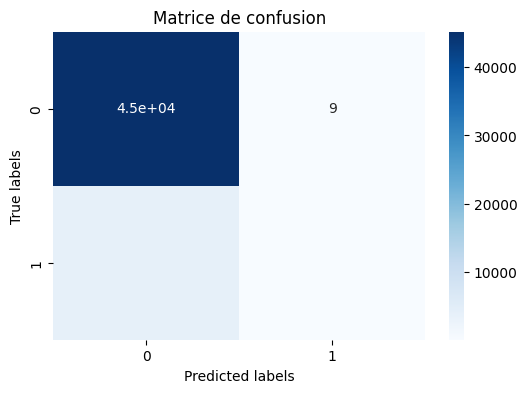

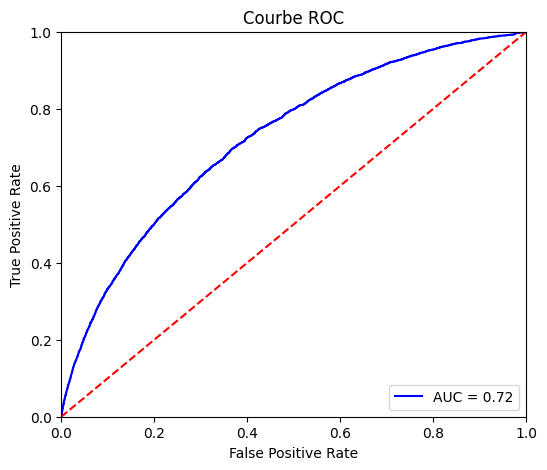

In [74]:
# Aucun rééquilibrage 
with mlflow.start_run(run_name='LogisticRegression sans équilibrage'):
    reg_log_inequal = LogisticRegression(max_iter=5000,random_state=0)
    reg_log_inequal.fit(X_train_scaled, y_train)

    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    eval_score(reg_log_inequal,X_val_scaled, y_val)
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

##### - *Rééquilibrage avec class_weight :*

La méthode des “poids de classe” est une technique pour gérer les jeux de données déséquilibrés lors de la création d’un modèle. Elle attribue des poids différents aux différentes classes, en donnant plus de poids aux classes moins représentées. Cela influence le modèle pendant son entraînement, en rendant les erreurs de classification des classes minoritaires plus coûteuses que celles des classes majoritaires.

Score métier :0.34
Accuracy score : 0.66
Precision score : 0.15
Recall score : 0.67
F1 score : 0.24
Fbeta score : 0.39
ROC AUC score : 0.66


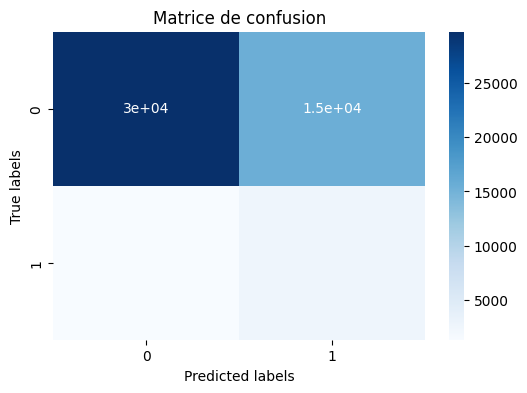

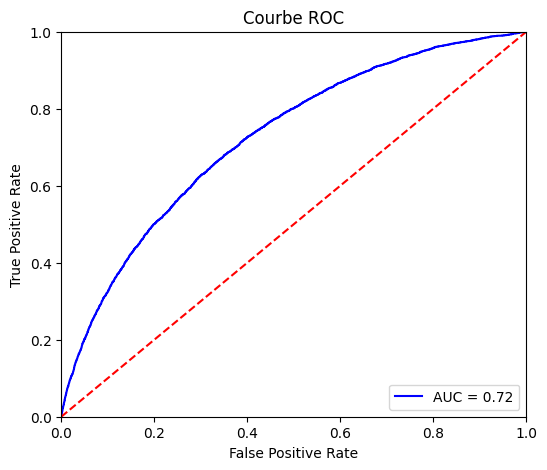

In [75]:
# Rééquilibrage avec class_weight

with mlflow.start_run(run_name='LogisticRegression class_weight'):
    reg_log_balanced = LogisticRegression(max_iter=5000, class_weight='balanced', random_state=0)
    reg_log_balanced.fit(X_train_scaled, y_train)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    eval_score(reg_log_balanced, X_val_scaled, y_val)
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

##### - *Rééquilibrage avec Sur-échantillonnage : SMOTE*

Le sur-échantillonnage, ou “oversampling”, est une technique pour équilibrer les classes dans un jeu de données déséquilibré. Il crée des échantillons supplémentaires pour la classe minoritaire.

SMOTE, qui signifie “Synthetic Minority Oversampling Technique”, est une méthode spécifique de sur-échantillonnage. Au lieu de simplement dupliquer les échantillons minoritaires, SMOTE crée de nouveaux échantillons qui sont similaires mais pas identiques aux échantillons existants. Cela permet d’augmenter la diversité des échantillons minoritaires.

Equilibre des classes : Counter({0: 226145, 1: 19860})
Equilibre des classes : Counter({0: 226145, 1: 226145})
Score métier :0.16
Accuracy score : 0.85
Precision score : 0.14
Recall score : 0.17
F1 score : 0.15
Fbeta score : 0.16
ROC AUC score : 0.54


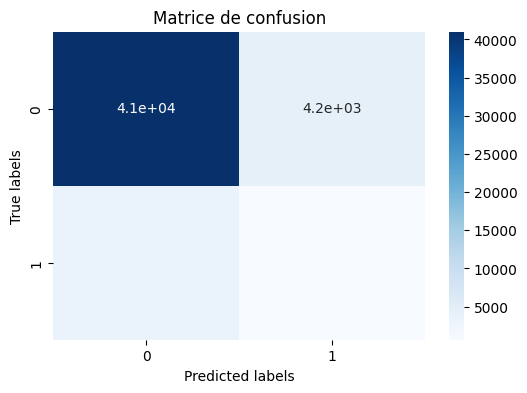

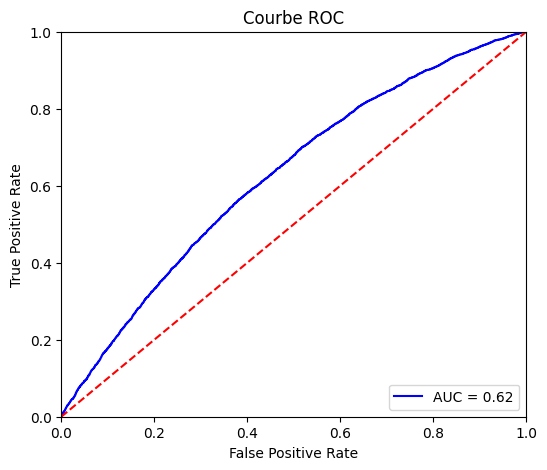

In [76]:
# Rééquilibrage avec Sur-échantillonnage (upsampling) de la classe minoritaire : SMOTE 

print('Equilibre des classes : {}'.format(Counter(y_train)))

# Définition de l'instance SMOTE
sm = SMOTE(random_state=0)

# Application du SMOTE aux données
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)

print('Equilibre des classes : {}'.format(Counter(y_train_sm)))

with mlflow.start_run(run_name='LogisticRegression upsampling'):
    reg_log_up = LogisticRegression(max_iter=1000, random_state=0)
    reg_log_up.fit(X_train_sm, y_train_sm)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    eval_score(reg_log_up, X_val_scaled, y_val)
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

##### - *Rééquilibrage avec Sous-échantillonnage :*

Le sous-échantillonnage, ou "undersampling", est une méthode pour équilibrer les classes dans un jeu de données déséquilibré. Il réduit le nombre d'échantillons de la classe majoritaire.

Equilibre des classes : Counter({0: 226145, 1: 19860})
Equilibre des classes : Counter({0: 19860, 1: 19860})
Score métier :0.34
Accuracy score : 0.66
Precision score : 0.15
Recall score : 0.67
F1 score : 0.24
Fbeta score : 0.39
ROC AUC score : 0.67


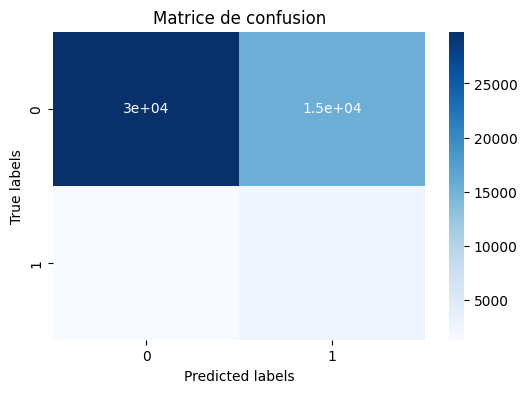

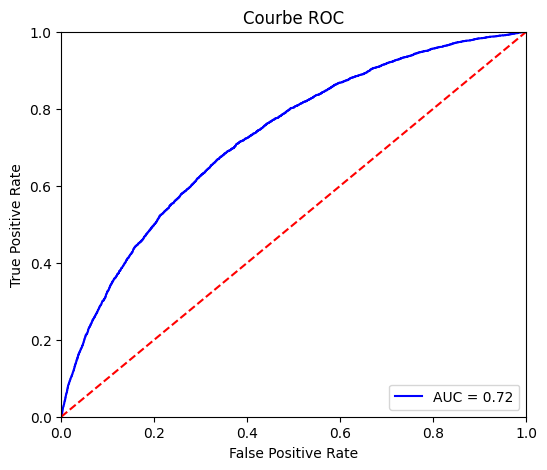

In [77]:
# Rééquilibrage avec Sous-échantillonnage (undersampling) de la classe majoritaire : RandomUnderSampler

print('Equilibre des classes : {}'.format(Counter(y_train)))

# Création de l'objet TomekLinks
under = RandomUnderSampler()

# Sous-échantillonnage en utilisant RandomUnderSampler
X_train_under, y_train_under = under.fit_resample(X_train_scaled, y_train)

print('Equilibre des classes : {}'.format(Counter(y_train_under)))


with mlflow.start_run(run_name='LogisticRegression undersampling Random'):
    reg_log_under_r = LogisticRegression(max_iter=1000, random_state=0)
    reg_log_under_r.fit(X_train_under, y_train_under)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    eval_score(reg_log_under_r, X_val_scaled, y_val)
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

##### - *Combinaison d'oversampling et undersampling : SMOTETomek*

SMOTETomek est une technique combinant l'oversampling (SMOTE) et l'undersampling (Tomek Links). Elle vise à résoudre le déséquilibre de classes en augmentant la classe minoritaire par synthèse d'échantillons (SMOTE) tout en réduisant la classe majoritaire en supprimant les exemples qui se trouvent à la frontière entre les classes (Tomek Links).

In [78]:
# Combinaison d'oversampling et d'undersampling : SMOTE (oversampling) et Tomek Links (undersampling)

print('Equilibre des classes avant: {}'.format(Counter(y_train)))

# Création de l'objet SMOTETomek
smote_tomek = SMOTETomek(random_state=0)

# Sous-échantillonnage en utilisant SMOTETomek
X_train_st, y_train_st = smote_tomek.fit_resample(X_train_scaled, y_train)

print('Equilibre des classes apres: {}'.format(Counter(y_train_st)))

Equilibre des classes avant: Counter({0: 226145, 1: 19860})
Equilibre des classes apres: Counter({0: 226139, 1: 226139})


Score métier :0.16
Accuracy score : 0.85
Precision score : 0.14
Recall score : 0.17
F1 score : 0.15
Fbeta score : 0.16
ROC AUC score : 0.54


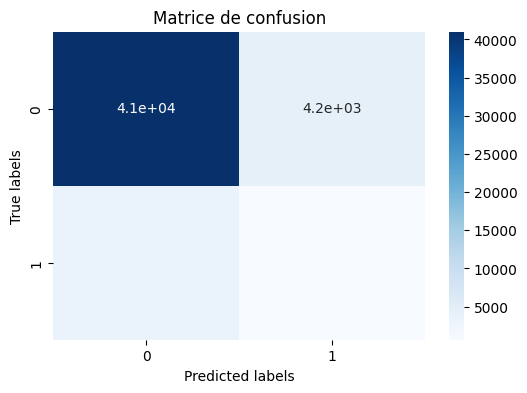

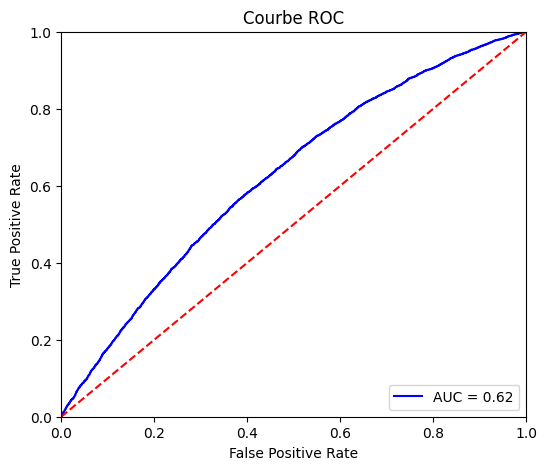

In [79]:
with mlflow.start_run(run_name='LogisticRegression combinaison'):
    reg_log_combi = LogisticRegression(max_iter=1000, random_state=0)
    reg_log_combi.fit(X_train_st, y_train_st)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    eval_score(reg_log_combi, X_val_scaled, y_val)
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

Nous avons opté pour la méthode de sous-échantillonnage avec *RandomUnderSampler* pour équilibrer nos données. 

Les méthodes *class_weight* et *RandomUnderSampler* ont montré les meilleurs résultats en termes de score métier. 

Cependant, tous les modèles ne prennent pas en charge l'argument *class_weight*. 

De plus, *RandomUnderSampler* est plus rapide que les autres méthodes. Nous avons donc choisi *RandomUnderSampler* pour pouvoir tester un plus grand nombre de modèles.

In [80]:
# enregistrer le df train rééquilibré 
pickle.dump(X_train_under, open('models/X_train_under.pkl', 'wb'))
pickle.dump(y_train_under, open('models/y_train_under.pkl', 'wb'))

In [81]:
X_train_scaled = pickle.load(open('models/X_train_under.pkl', 'rb'))
y_train = pickle.load(open('models/y_train_under.pkl', 'rb'))

#### <font color = 'green'><u>*IV.3 - Dummy Classifier (base line) :* </u></font> 

- **Dummy Classifier (baseline)** : ne prend pas en compte les caractéristiques du jeu de données et se contente de faire des prédictions en utilisant des règles simples. Ici, on renvoie l'étiquette de classe la plus fréquente dans l'argument y observé. 

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Score métier :0.11
Accuracy score : 0.92
Precision score : 0.00
Recall score : 0.00
F1 score : 0.00
Fbeta score : 0.00
ROC AUC score : 0.50


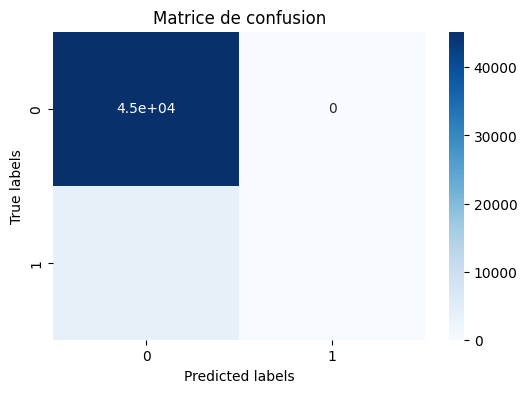

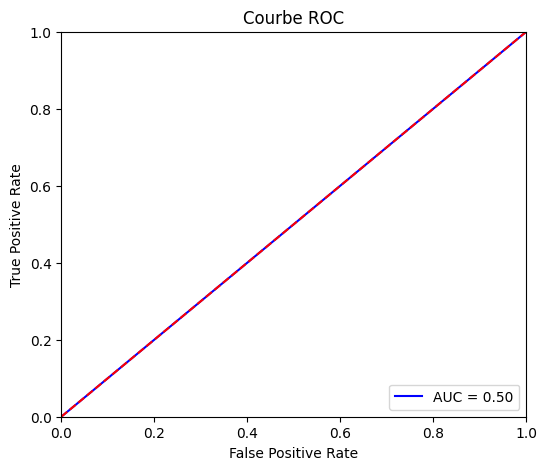

In [82]:
with mlflow.start_run(run_name='Dummy Classifier'):
    dummy = DummyClassifier(random_state=0)
    dummy.fit(X_train_scaled, y_train)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    eval_score(dummy, X_val_scaled, y_val)
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

Score métier maximum : 0.11
Threshold optimal : 0.5


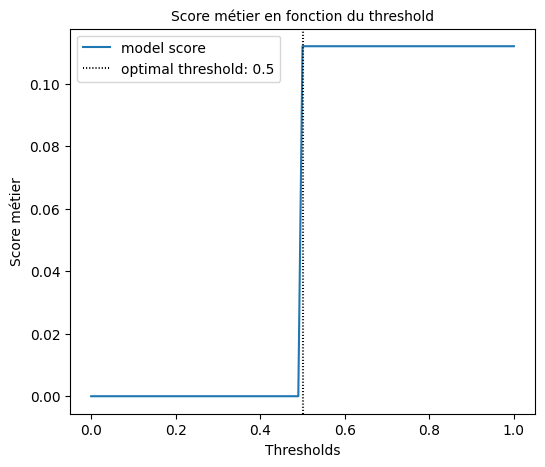

In [83]:
score_metier_max(y_pred_proba, y_val, verbose=True)

La matrice de confusion révèle que le Dummy Classifier prédit correctement uniquement la classe 0 (client sans défaut), ce qui entraîne un grand nombre de faux négatifs (client à risque prédit comme bon client). C'est pourquoi son score métier, qui pénalise davantage les faux négatifs, est assez bas.

La plupart de nos scores sont à 0 car le modèle ne prédit aucune valeur positive. Cela entraîne une division par zéro, d'où l'estimation des scores à 0.

On observe également que l'AUC est de 0.5, ce qui est typique pour les modèles de base.

#### <font color = 'green'><u>*IV.3 - Logistic Regression :* </u></font> 

Score métier :0.34
Accuracy score : 0.66
Precision score : 0.15
Recall score : 0.67
F1 score : 0.24
Fbeta score : 0.39
ROC AUC score : 0.67


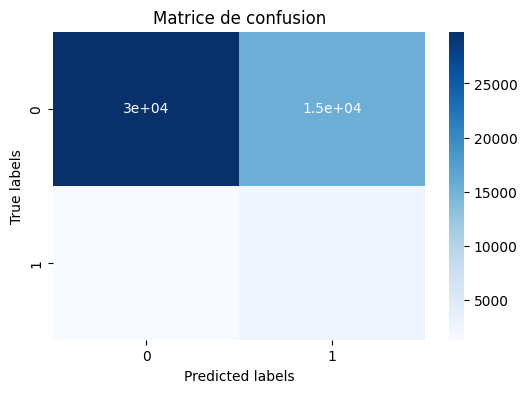

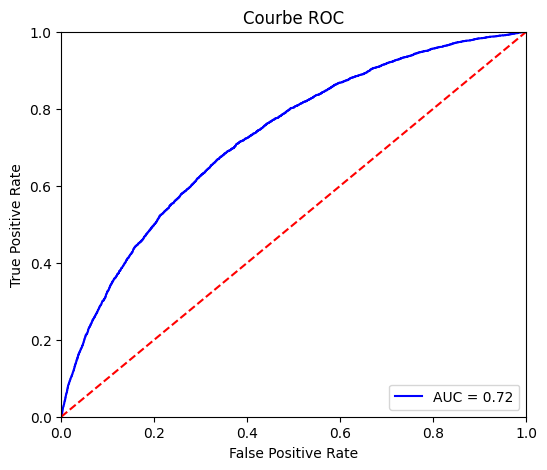

In [84]:
with mlflow.start_run(run_name='Logistic Regression'):
    reg_log = LogisticRegression(max_iter=1000, random_state=0)
    reg_log.fit(X_train_scaled, y_train)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    eval_score(reg_log, X_val_scaled, y_val)
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

Score métier maximum : 0.34
Threshold optimal : 0.51


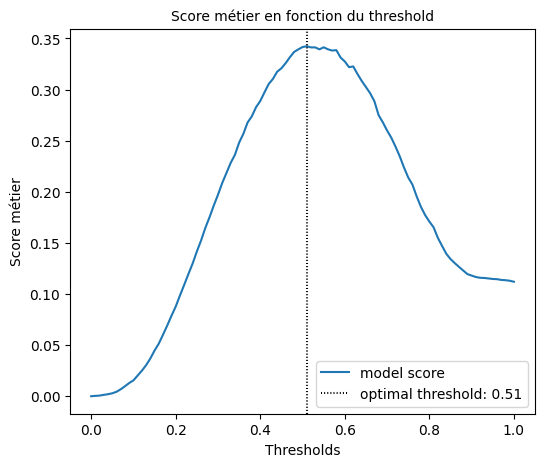

In [85]:
score_metier_max(y_pred_proba, y_val, verbose=True)

Le score métier est sensiblement amélioré, atteignant 0.41.

En examinant la matrice de confusion, on remarque que les faux négatifs sont moins nombreux que les autres catégories. Toutefois, le modèle génère un grand nombre de faux positifs.

Comme prévu, le score F-bêta est supérieur au score F, car le rappel est plus élevé que la précision. Ce score a été conçu pour privilégier le rappel par rapport à la précision.

Enfin, le score ROC AUC s'améliore par rapport à la baseline, atteignant 0.77.

#### <font color = 'green'><u>*IV.3 - XGBoost :* </u></font> 

Score métier :0.34
Accuracy score : 0.67
Precision score : 0.15
Recall score : 0.67
F1 score : 0.24
Fbeta score : 0.39
ROC AUC score : 0.67


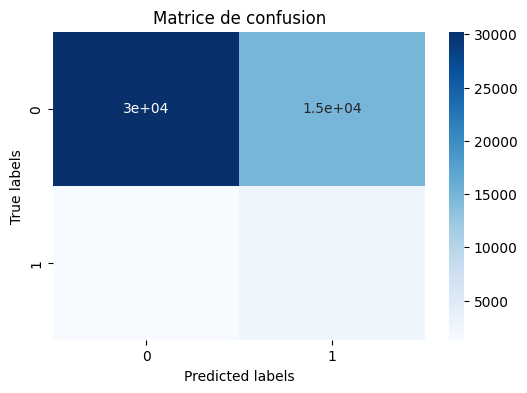

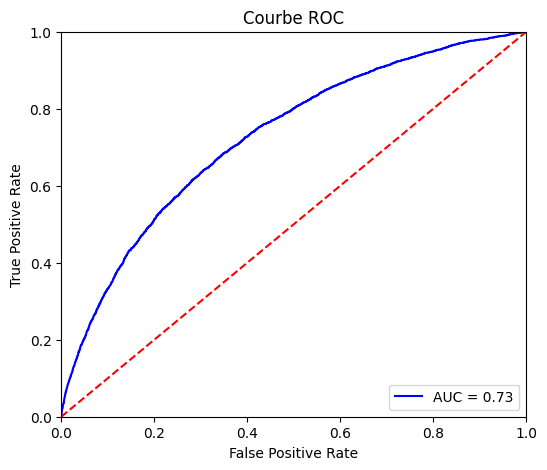

In [86]:
with mlflow.start_run(run_name='XGBoost Classifier'):
    xgb = XGBClassifier(random_state=0)
    xgb.fit(X_train_scaled, y_train)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    eval_score(xgb, X_val_scaled, y_val)
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

Score métier maximum : 0.35
Threshold optimal : 0.54


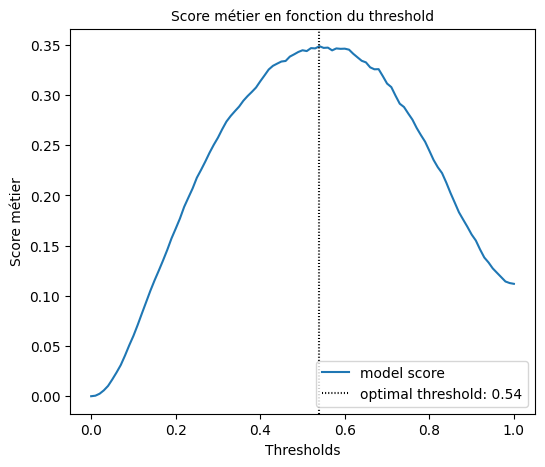

In [87]:
score_metier_max(y_pred_proba, y_val, verbose=True)

Le score métier est un peu plus bas que celui de LR, atteignant 0.39.

En regardant la matrice de confusion, on voit que les faux négatifs sont moins nombreux que les autres catégories. Cependant, le modèle produit beaucoup de faux positifs.

Comme prévu, le score F-bêta est supérieur au score F, car le rappel est plus important que la précision. Ce score a été conçu pour donner plus de poids au rappel qu'à la précision.

Enfin, le score ROC AUC s'améliore par rapport à la baseline, atteignant 0.76.

#### <font color = 'green'><u>*IV.3 - Light GBM :* </u></font> 

Score métier :0.37
Accuracy score : 0.68
Precision score : 0.16
Recall score : 0.68
F1 score : 0.26
Fbeta score : 0.41
ROC AUC score : 0.68


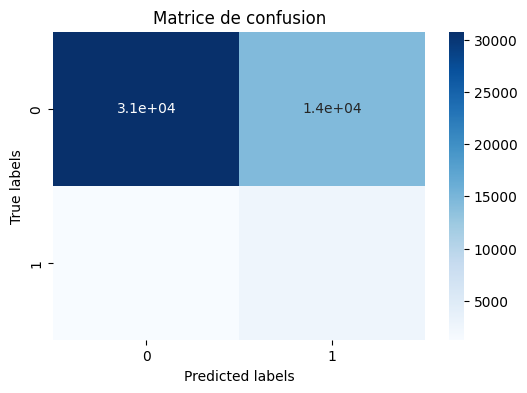

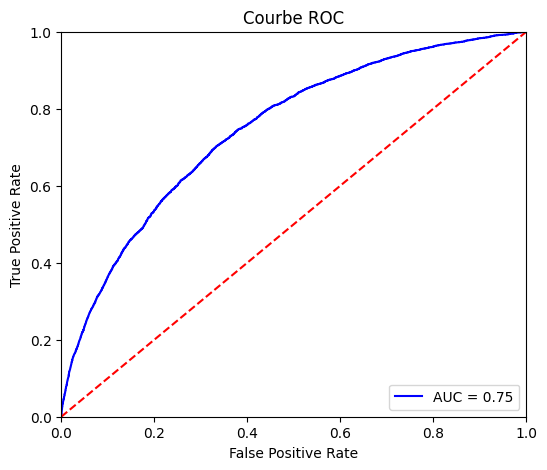

In [88]:
with mlflow.start_run(run_name='LGBM Classifier'):
    lgbm = LGBMClassifier(random_state=0)
    lgbm.fit(X_train_scaled, y_train)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    eval_score(lgbm, X_val_scaled, y_val)
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

Score métier maximum : 0.37
Threshold optimal : 0.49


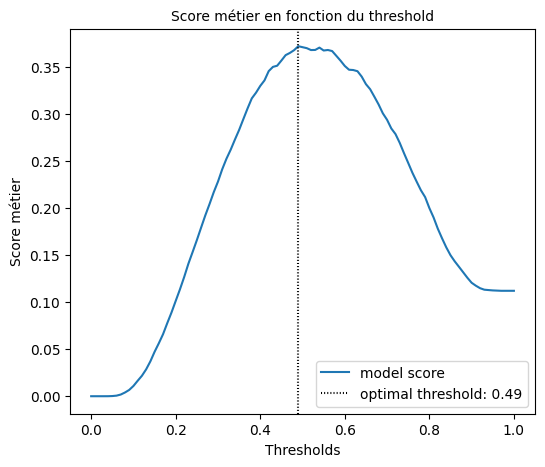

In [89]:
score_metier_max(y_pred_proba, y_val, verbose=True)

Le score métier est un peu plus élevé que celui de XGBoost, atteignant 0.41.

En examinant la matrice de confusion, on voit que les faux négatifs sont moins nombreux que les autres catégories. Cependant, le modèle produit beaucoup de faux positifs.

Comme prévu, le score F-bêta est supérieur au score F, car le rappel est plus important que la précision. Ce score a été conçu pour donner plus de poids au rappel qu’à la précision.

Enfin, le score ROC AUC s’améliore par rapport à la baseline, atteignant 0.77.

## <font color = ##04f6ab> V : </font> <font color = #27C3E5> Optimisation des modèles </font><img src="https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png" width="100%" height="5" />

#### <font color = 'green'><u>*V.1 - Logistic Regression :* </u></font> 

In [90]:
def plot_learning_curve(estimator, X, y):
    '''Affiche la courbe d'apprentissage.
    :param: estimator (meilleur estiateur de la grid search), X (valeurs), y (target)    
    '''
    
    train_sizes, train_scores, test_scores = learning_curve(estimator=estimator, X=X, y=y, cv=5, 
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            n_jobs= -1, verbose=0)
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Score')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title('Learning Curve')
    plt.xlabel('Training Data Size')
    plt.ylabel('Performance score métier')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

In [91]:
# Define the custom scoring function
score_metier = metrics.make_scorer(fonction_metier, greater_is_better=True)

# Define the hyperparameters for grid search
params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [1e-5, 1e-2, 1, 10, 100],
    'solver': ['liblinear']
}


# Start an MLflow run
with mlflow.start_run(run_name='Grid logistic regression'):
    # Initialize the logistic regression model
    reg_log = LogisticRegression(max_iter=1000, random_state=0)

    # Initialize the grid search
    grid_reg_log = GridSearchCV(
        reg_log,
        param_grid=params,
        cv=5,
        scoring=score_metier,
        return_train_score=True,
        n_jobs=-1
    )
    
    # Fit the grid search
    grid_reg_log.fit(X_train_scaled, y_train)

# Print the best parameters
print('Best parameters:', grid_reg_log.best_params_)

# Get the results of the grid search
result_reg_log = pd.DataFrame(grid_reg_log.cv_results_)

# Display the results for the best parameters
print("Results for the best parameters:\n")
display(result_reg_log.loc[result_reg_log['params'] == grid_reg_log.best_params_])


25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\aagrz\miniconda3\envs\HomeCredit\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\aagrz\miniconda3\envs\HomeCredit\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\aagrz\miniconda3\envs\HomeCredit\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\aagrz\miniconda3\envs\HomeCredit\lib

Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Results for the best parameters:



mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
6      41.916912     17.570472         0.074773        0.030937       1   

  param_penalty param_solver  \
6            l1    liblinear   

                                             params  split0_test_score  \
6  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}           -1.29922   

   split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
6          -1.310045  ...        -1.299194        0.040316                1   

   split0_train_score  split1_train_score  split2_train_score  \
6           -1.300636           -1.278575           -1.278606   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
6           -1.293146           -1.272973         -1.284787         0.010367  

[1 rows x 23 columns]

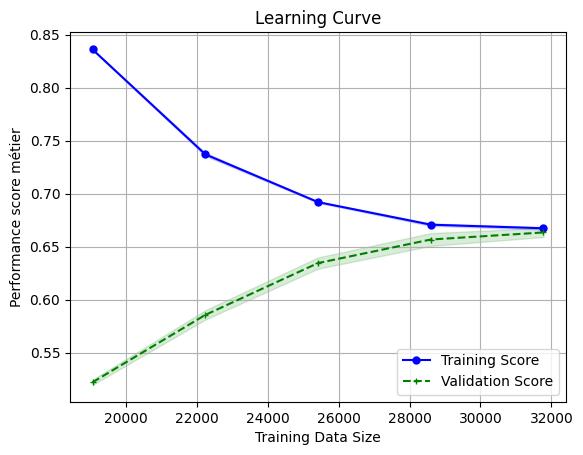

In [92]:
plot_learning_curve(grid_reg_log.best_estimator_, X_train_scaled, y_train)

Score métier :0.34
Accuracy score : 0.66
Precision score : 0.15
Recall score : 0.67
F1 score : 0.24
Fbeta score : 0.39
ROC AUC score : 0.67


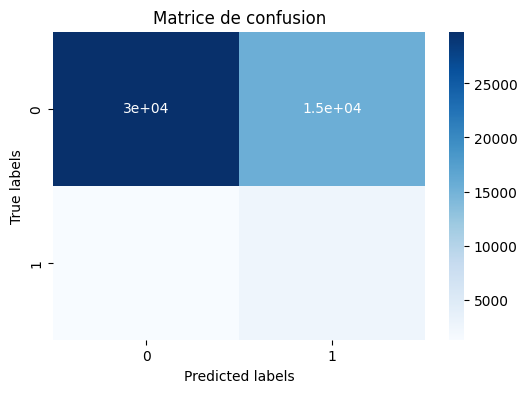

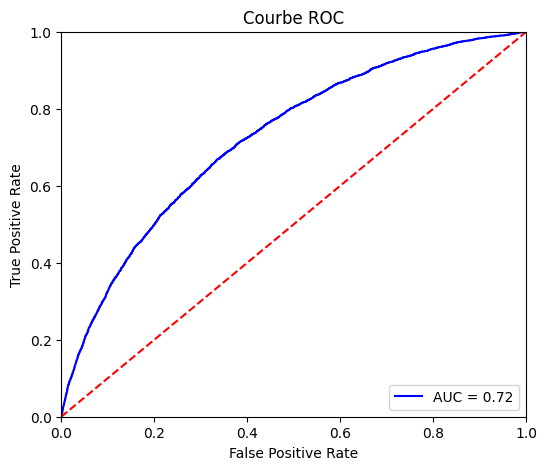

In [93]:
with mlflow.start_run(run_name='Logistic regression optimise'):
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    eval_score(grid_reg_log, X_val_scaled, y_val)
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

Score métier maximum : 0.34
Threshold optimal : 0.51


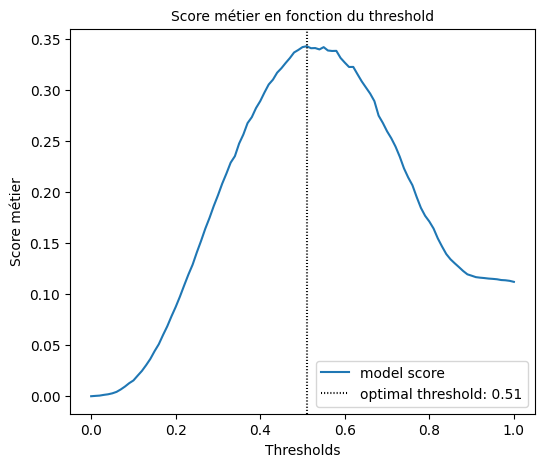

In [94]:
score_metier_max(y_pred_proba, y_val, verbose=True)

Les hyperparamètres optimaux ne semblent pas avoir d'impact significatifs sur les performances de notre modèle.

#### <font color = 'green'><u>*V.2 - XGBoost :* </u></font> 

In [95]:
params = {'gamma': [0, 0.1, 0.5, 1],
          'max_depth': [2,4,6],
          'min_child_weight' : [1,5,10],
          'n_estimators': [100, 300, 500],
         }

with mlflow.start_run(run_name='Grid XGBoost'):
    xgb = XGBClassifier(random_state=0)
    grid_xgb = GridSearchCV(
        xgb,
        param_grid=params,
        cv=5,
        scoring=score_metier_max,
        return_train_score = True,
        n_jobs = -1)
    
    grid_xgb.fit(X_train_scaled, y_train)

result_xgb = pd.DataFrame(grid_xgb.cv_results_)
result_xgb.head()

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_gamma  \
0       2.804375      0.156359         0.001400        0.001431           0   
1       6.603524      0.222482         0.001352        0.000873           0   
2      10.062398      0.195782         0.002497        0.004994           0   
3       3.439050      0.093299         0.000364        0.000451           0   
4       6.701927      0.183466         0.000488        0.000600           0   

  param_max_depth param_min_child_weight param_n_estimators  \
0               2                      1                100   
1               2                      1                300   
2               2                      1                500   
3               2                      5                100   
4               2                      5                300   

                                              params  split0_test_score  ...  \
0  {'gamma': 0, 'max_depth': 2, 'min_child_weight...                NaN  ...   
1  {'gamma': 0, 'max_depth': 2, 'min_child_weight...                NaN  ...   
2  {'gamma': 0, 'max_depth': 2, 'min_child_weight...                NaN  ...   
3  {'gamma': 0, 'max_depth': 2, 'min_child_weight...                NaN  ...   
4  {'gamma': 0, 'max_depth': 2, 'min_child_weight...                NaN  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0              NaN             NaN                1                 NaN   
1              NaN             NaN                1                 NaN   
2              NaN             NaN                1                 NaN   
3              NaN             NaN                1                 NaN   
4              NaN             NaN                1                 NaN   

   split1_train_score  split2_train_score  split3_train_score  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   split4_train_score  mean_train_score  std_train_score  
0                 NaN               NaN              NaN  
1                 NaN               NaN              NaN  
2                 NaN               NaN              NaN  
3                 NaN               NaN              NaN  
4                 NaN               NaN              NaN  

[5 rows x 24 columns]

In [96]:
print('Meilleurs paramètres', grid_xgb.best_params_)
print("Résultats des meilleurs paramètres :\n")
display(result_xgb.loc[result_xgb['params']==grid_xgb.best_params_])

Meilleurs paramètres {'gamma': 0, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 100}
Résultats des meilleurs paramètres :



mean_fit_time  std_fit_time  mean_score_time  std_score_time param_gamma  \
0       2.804375      0.156359           0.0014        0.001431           0   

  param_max_depth param_min_child_weight param_n_estimators  \
0               2                      1                100   

                                              params  split0_test_score  ...  \
0  {'gamma': 0, 'max_depth': 2, 'min_child_weight...                NaN  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0              NaN             NaN                1                 NaN   

   split1_train_score  split2_train_score  split3_train_score  \
0                 NaN                 NaN                 NaN   

   split4_train_score  mean_train_score  std_train_score  
0                 NaN               NaN              NaN  

[1 rows x 24 columns]

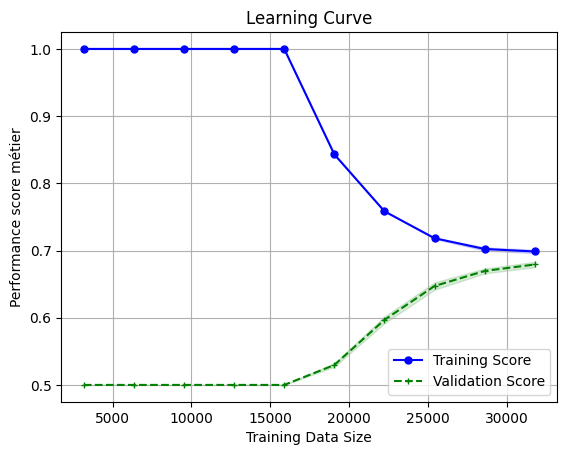

In [97]:
plot_learning_curve(grid_xgb.best_estimator_, X_train_scaled, y_train)

Score métier :0.37
Accuracy score : 0.68
Precision score : 0.16
Recall score : 0.68
F1 score : 0.26
Fbeta score : 0.41
ROC AUC score : 0.68


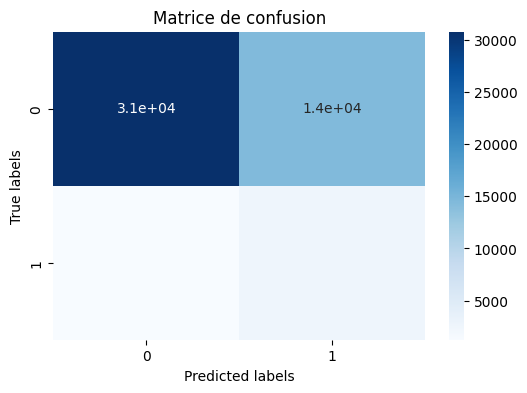

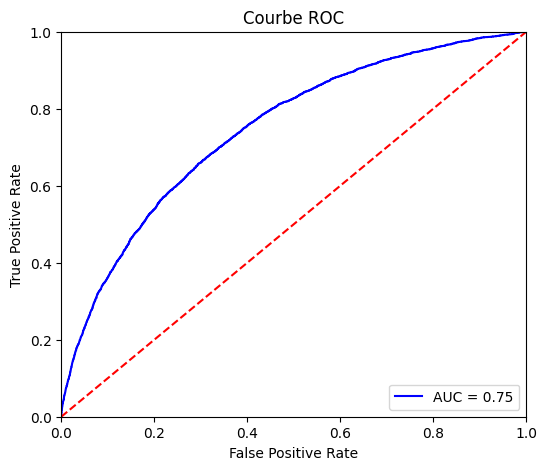

In [98]:
with mlflow.start_run(run_name='XGBoost optimise'):
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    eval_score(grid_xgb, X_val_scaled, y_val)
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

Score métier maximum : 0.37
Threshold optimal : 0.52


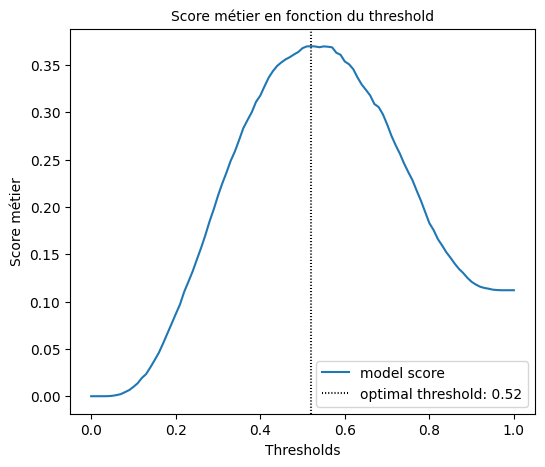

In [99]:
score_metier_max(y_pred_proba, y_val, verbose=True)
# Call the function with the predicted probabilities and the true labels
#score_metier_max(y_pred_proba, X_test_scaled, y_test, verbose=True)

#### <font color = 'green'><u>*V.3 - Light GBM :* </u></font> 

In [100]:
score_metier = metrics.make_scorer(fonction_metier, greater_is_better=True)

In [101]:
params = {'n_estimators' : [100, 300, 500, 800],
          'max_depth': [-1, 2, 5, 7],
          'num_leaves': [7, 15, 31, 63, 127],
          'learning_rate': [0.05, 0.1, 0.2, 0.4]
         }

mlflow.lightgbm.autolog(log_input_examples=True, silent=True)
with mlflow.start_run(run_name='Grid finale Light GBM'):
    lgbm_fin = LGBMClassifier(random_state=0)
    grid_lgbm_fin = GridSearchCV(
        lgbm_fin,
        param_grid=params,
        cv=5,
        scoring=score_metier,
        return_train_score = True,
        n_jobs = -1)
    
    grid_lgbm_fin.fit(X_train_scaled, y_train)

In [102]:
result_lgbm_fin = pd.DataFrame(grid_lgbm_fin.cv_results_)
result_lgbm_fin.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.657000      0.770485         0.134522        0.022853   
1       5.804044      0.496923         0.166598        0.064748   
2      10.960597      1.253711         0.201028        0.044018   
3      15.452628      2.848811         0.164903        0.041999   
4      26.135520      3.571023         0.272168        0.049830   

  param_learning_rate param_max_depth param_n_estimators param_num_leaves  \
0                0.05              -1                100                7   
1                0.05              -1                100               15   
2                0.05              -1                100               31   
3                0.05              -1                100               63   
4                0.05              -1                100              127   

                                              params  split0_test_score  ...  \
0  {'learning_rate': 0.05, 'max_depth': -1, 'n_es...          -1.363671  ...   
1  {'learning_rate': 0.05, 'max_depth': -1, 'n_es...          -1.317724  ...   
2  {'learning_rate': 0.05, 'max_depth': -1, 'n_es...          -1.282603  ...   
3  {'learning_rate': 0.05, 'max_depth': -1, 'n_es...          -1.290911  ...   
4  {'learning_rate': 0.05, 'max_depth': -1, 'n_es...          -1.302618  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0        -1.336707        0.034496              256           -1.257868   
1        -1.297961        0.046261              214           -1.128178   
2        -1.273817        0.050476              168           -0.940930   
3        -1.279909        0.051549              186           -0.694612   
4        -1.275856        0.034097              170           -0.267529   

   split1_train_score  split2_train_score  split3_train_score  \
0           -1.241157           -1.256546           -1.265892   
1           -1.115181           -1.116944           -1.113576   
2           -0.933661           -0.960568           -0.940521   
3           -0.686304           -0.689955           -0.686965   
4           -0.257679           -0.262525           -0.253053   

   split4_train_score  mean_train_score  std_train_score  
0           -1.227121         -1.249717         0.013846  
1           -1.102247         -1.115225         0.008269  
2           -0.936461         -0.942428         0.009459  
3           -0.692756         -0.690118         0.003215  
4           -0.252801         -0.258717         0.005662  

[5 rows x 24 columns]

In [103]:
print('Meilleurs paramètres',grid_lgbm_fin.best_params_)
print("Résultats des meilleurs paramètres :\n")
display(result_lgbm_fin.loc[result_lgbm_fin['params']==grid_lgbm_fin.best_params_])

Meilleurs paramètres {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'num_leaves': 31}
Résultats des meilleurs paramètres :



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
47      15.009088      2.516675         0.466196        0.060865   

   param_learning_rate param_max_depth param_n_estimators param_num_leaves  \
47                0.05               5                300               31   

                                               params  split0_test_score  ...  \
47  {'learning_rate': 0.05, 'max_depth': 5, 'n_est...          -1.221551  ...   

    mean_test_score  std_test_score  rank_test_score  split0_train_score  \
47        -1.218882        0.068607                1           -0.717428   

    split1_train_score  split2_train_score  split3_train_score  \
47           -0.710788           -0.724698           -0.707358   

    split4_train_score  mean_train_score  std_train_score  
47           -0.691371         -0.710329         0.011183  

[1 rows x 24 columns]

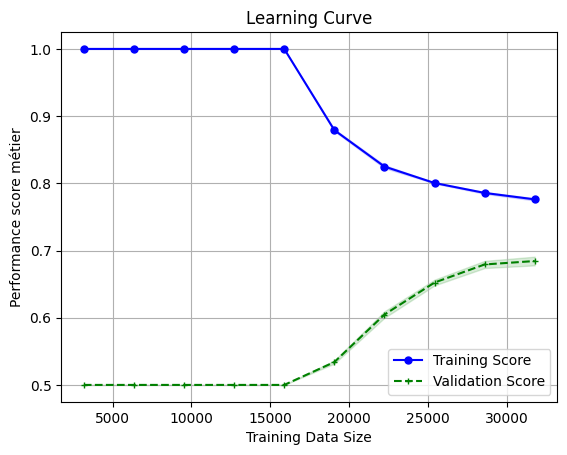

In [104]:
plot_learning_curve(grid_lgbm_fin.best_estimator_, X_train_scaled, y_train)

Score métier :0.37
Accuracy score : 0.68
Precision score : 0.16
Recall score : 0.69
F1 score : 0.26
Fbeta score : 0.41
ROC AUC score : 0.68


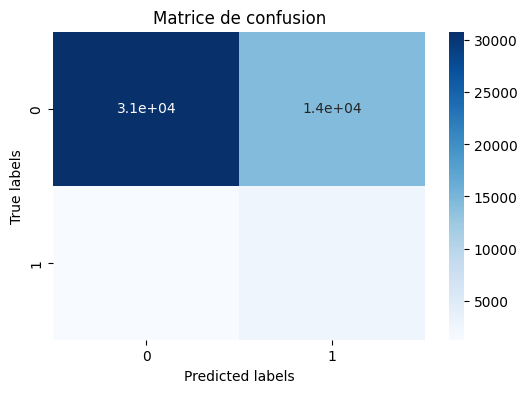

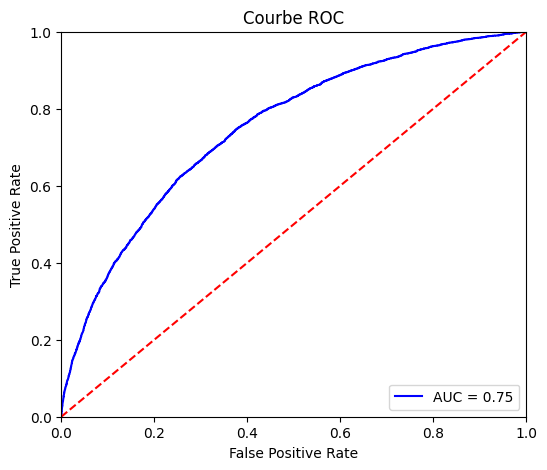

In [105]:
mlflow.lightgbm.autolog(log_input_examples=True, silent=True)
with mlflow.start_run(run_name='Light GBM final optimise'):
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    eval_score(grid_lgbm_fin, X_val_scaled, y_val)
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

Score métier maximum : 0.38
Threshold optimal : 0.54


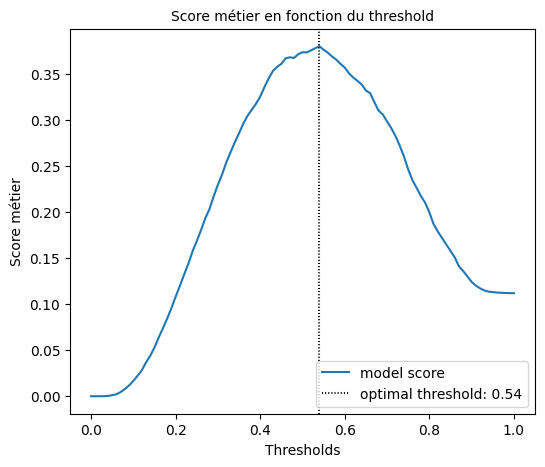

In [106]:
# Call the function with the predicted probabilities and the true labels
score_metier_max(y_pred_proba, y_val, verbose=True)

Le modèle Light GBM avec les hyperparamètres suivants : ` {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'num_leaves': 31}`
est le modèle le plus performant. 

Nous allons donc utiliser ce modèle par la suite. Nous décidons dans un premier temps de réaliser une grid search plus poussée avec l'algorithme Light GBM afin de tenter d'obtenir de meilleures performances.

#### <font color = 'green'><u>*V.4 - Model final et sauvgarde du pipeline :* </u></font> 

Score métier :0.38
Accuracy score : 0.75
Precision score : 0.18
Recall score : 0.60
F1 score : 0.28
Fbeta score : 0.41
ROC AUC score : 0.68


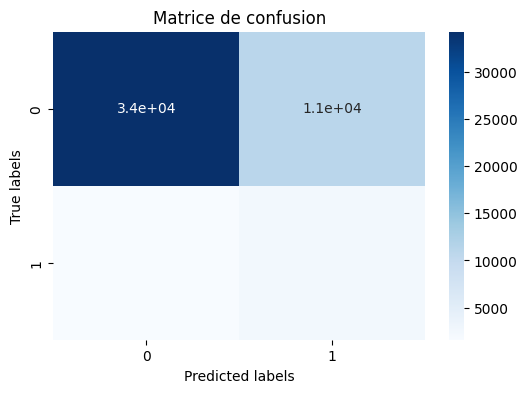

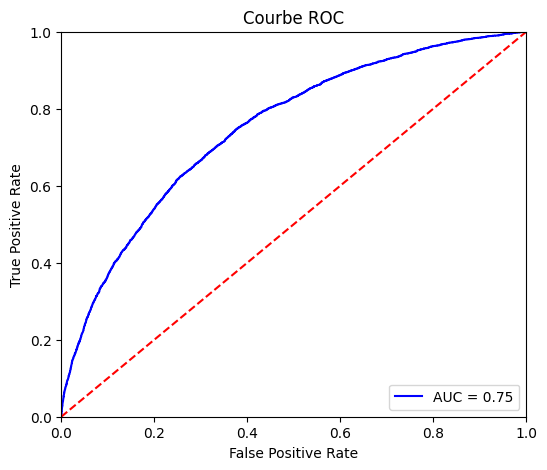

In [128]:
mlflow.autolog(log_input_examples=True, silent=True)
with mlflow.start_run(run_name='model select'):
    lgbm_final = LGBMClassifier(learning_rate=0.05, max_depth=5, n_estimators=300, num_leaves=31, random_state=42)
    lgbm_final.fit(X_train_scaled, y_train)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    eval_score(lgbm_final, X_val_scaled, y_val, seuil=0.55)
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

In [129]:
X_val.dtypes.value_counts()

float64    105
int32       21
int64       11
Name: count, dtype: int64

In [130]:
y_val.value_counts(normalize=True)

TARGET
0    0.91927
1    0.08073
Name: proportion, dtype: float64

Score métier :0.37
Accuracy score : 0.70
Precision score : 0.16
Recall score : 0.66
F1 score : 0.26
Fbeta score : 0.41
ROC AUC score : 0.68


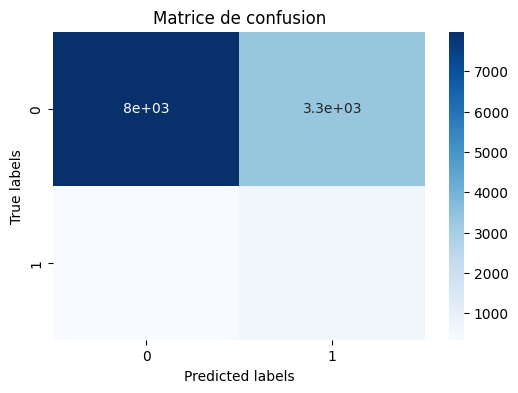

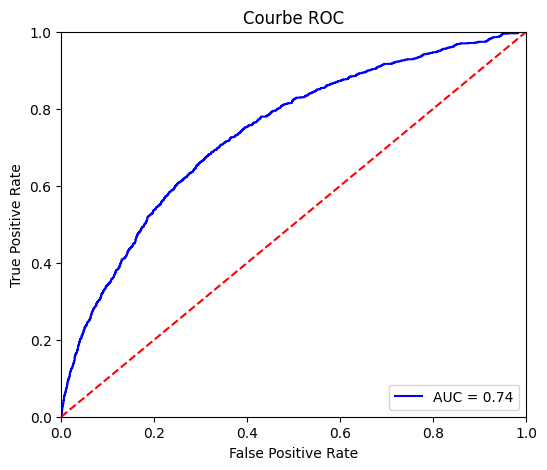

In [131]:
cols = X_train.select_dtypes(['float64']).columns
preprocessor = ColumnTransformer([('quanti', StandardScaler(), cols)],remainder='passthrough')

pipe = Pipeline(steps = [['scaler', preprocessor],
                         ['sampling',RandomUnderSampler()],
                         ['classifier', LGBMClassifier(learning_rate=0.1,
                                                       max_depth=2,
                                                       n_estimators=800,
                                                       num_leaves=7,
                                                       random_state=0)]
                        ])

mlflow.lightgbm.autolog(log_input_examples=True, silent=True)
with mlflow.start_run(run_name='pip final'):
    pipe.fit(X_val, y_val)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    eval_score(pipe, X_val_test, y_val_test, seuil=0.53)
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

L'application de la pipeline sur le jeu de test nous donne des résultats similaires à ceux du jeu de validation.

In [132]:
X_train.dtypes.value_counts()

float64    105
float32     32
Name: count, dtype: int64

In [133]:
# Assuming df is your DataFrame
for col in X_train.columns:
    if X_train[col].dtype == np.int32 or X_train[col].dtype == np.int64:
        X_train[col] = X_train[col].astype(np.float32)

In [134]:
X_train.isnull().sum().sum()

0

In [135]:
y_train.value_counts(normalize=True)

TARGET
0    0.5
1    0.5
Name: proportion, dtype: float64

In [136]:
from mlflow.models.signature import infer_signature

In [138]:
signature = infer_signature(X_train, y_train)
mlflow.sklearn.save_model(pipe, 'mlflow_model', signature=signature)

## <font color = ##04f6ab> VI : </font> <font color = #27C3E5> Feature importance </font><img src="https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png" width="100%" height="5" />

#### <font color = 'green'><u>*VI.1 - Shap :* </u></font>

Nous allons maintenant utiliser les valeurs SHAP pour décomposer notre modèle.

SHAP, qui signifie SHapley Additive exPlanations, est une technique qui nous aide à comprendre les prédictions des modèles de machine learning. L’essence de SHAP est de rendre les prédictions des modèles sophistiqués plus accessibles. Il nous montre comment chaque caractéristique affecte la prédiction finale en lui attribuant une valeur d’importance.

Avec SHAP, nous pouvons obtenir des explications qui sont globales (c’est-à-dire qu’elles concernent l’ensemble du modèle) et locales (c’est-à-dire qu’elles concernent une prédiction spécifique).

<div text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*0P0XpfQopza0CgVArXjGJg.png" alt="Image">
</div>

In [139]:
explainer_pipe = shap.TreeExplainer(pipe['classifier'])
shap_values_pipe = explainer_pipe.shap_values(X_val_scaled)

c:\Users\aagrz\miniconda3\envs\HomeCredit\lib\site-packages\shap\explainers\_tree.py:382: UserWarning:

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray



- Les 20 features les plus importantes pour notre modèle

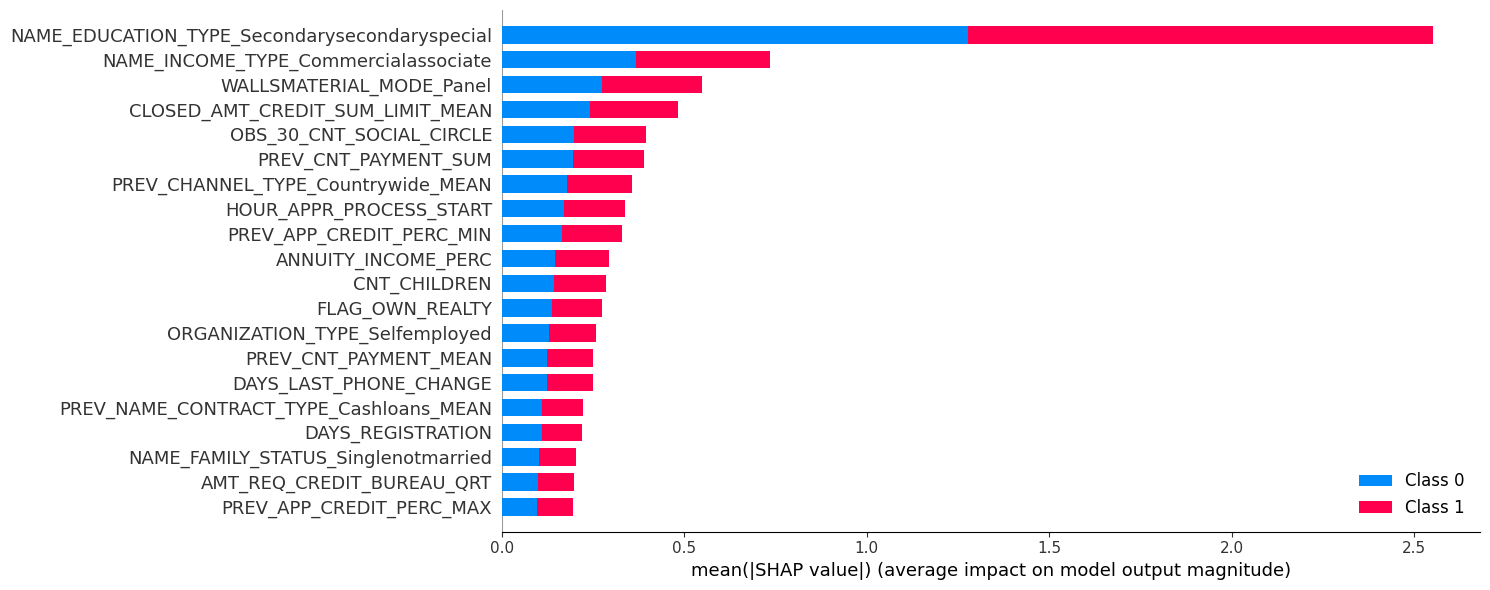

In [140]:
shap.summary_plot(shap_values_pipe, X_val_scaled, plot_type='bar', plot_size=(15,6))

c:\Users\aagrz\miniconda3\envs\HomeCredit\lib\site-packages\shap\plots\_beeswarm.py:699: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



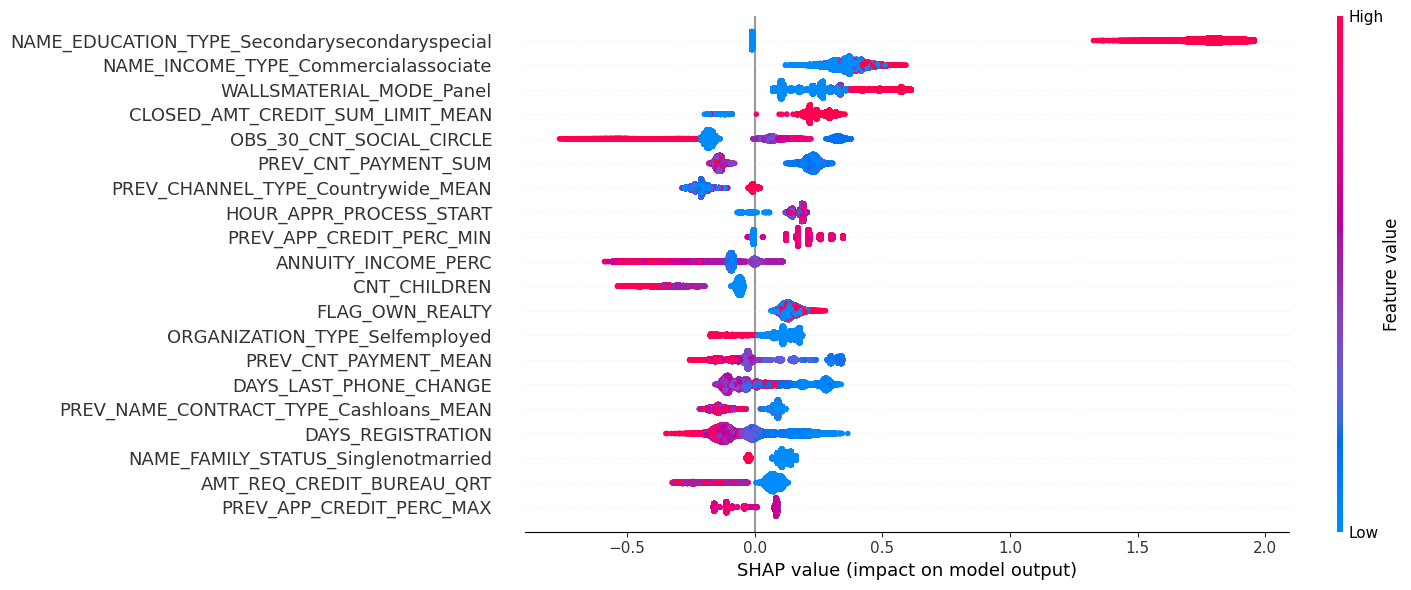

In [141]:
shap.summary_plot(shap_values_pipe[1], X_val_scaled.values, feature_names = X_val_scaled.columns, plot_size=(15,6))

Ce graphique regroupe les valeurs SHAP de toutes les caractéristiques et de tous les échantillons de l’ensemble choisi. Les valeurs SHAP sont ensuite classées par ordre d’importance.

Les caractéristiques les plus influentes sont PREV_NAME_CLIENT_TYPE_XNA_MEAN et DAYS_REGISTRATION. Des valeurs faibles pour ces deux caractéristiques orientent la prédiction vers 1, indiquant un défaut du client. Cette tendance est inversée pour certaines autres caractéristiques.

In [142]:
i = 0
shap.initjs()
print("Individu ID: {}".format(X_val_scaled.index[i]))
shap.force_plot(explainer_pipe.expected_value[1],
                shap_values_pipe[1][i],
                X_val_scaled.values[i],
                feature_names = X_val_scaled.columns)

Individu ID: 127195


In [143]:
i = 1
shap.initjs()
print("Individu ID: {}".format(X_val_scaled.index[i]))
shap.force_plot(explainer_pipe.expected_value[1],
                shap_values_pipe[1][i],
                X_val_scaled.values[i],
                feature_names = X_val_scaled.columns)

Individu ID: 153005


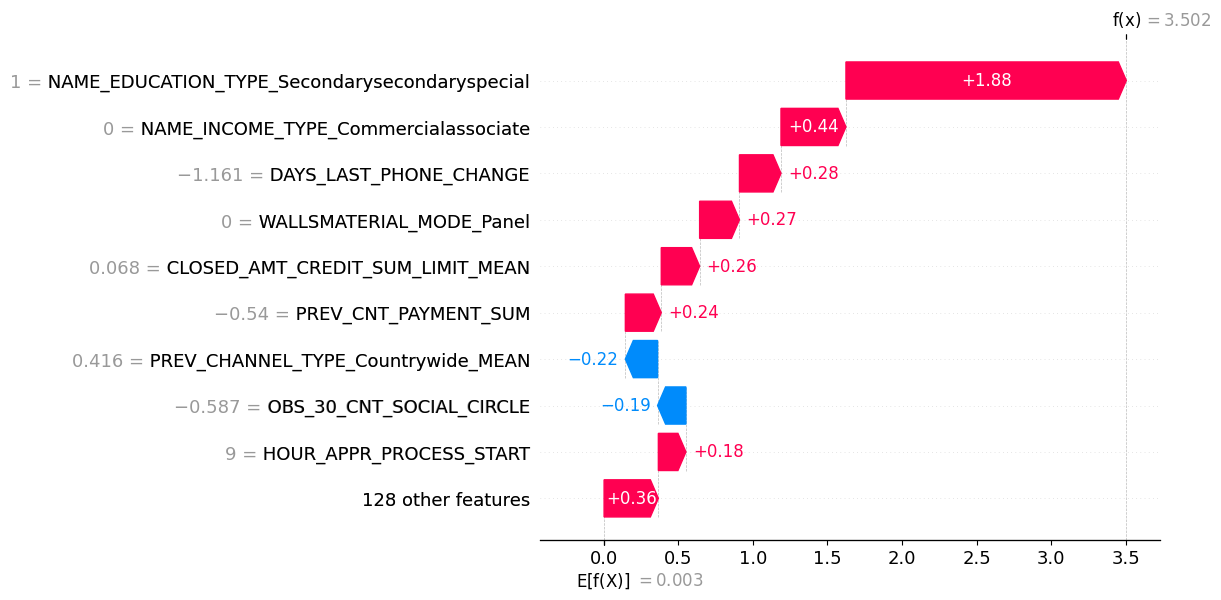

In [144]:
# Individu ID: 284800
shap.waterfall_plot(explainer_pipe(X_val_scaled)[0][:,1])

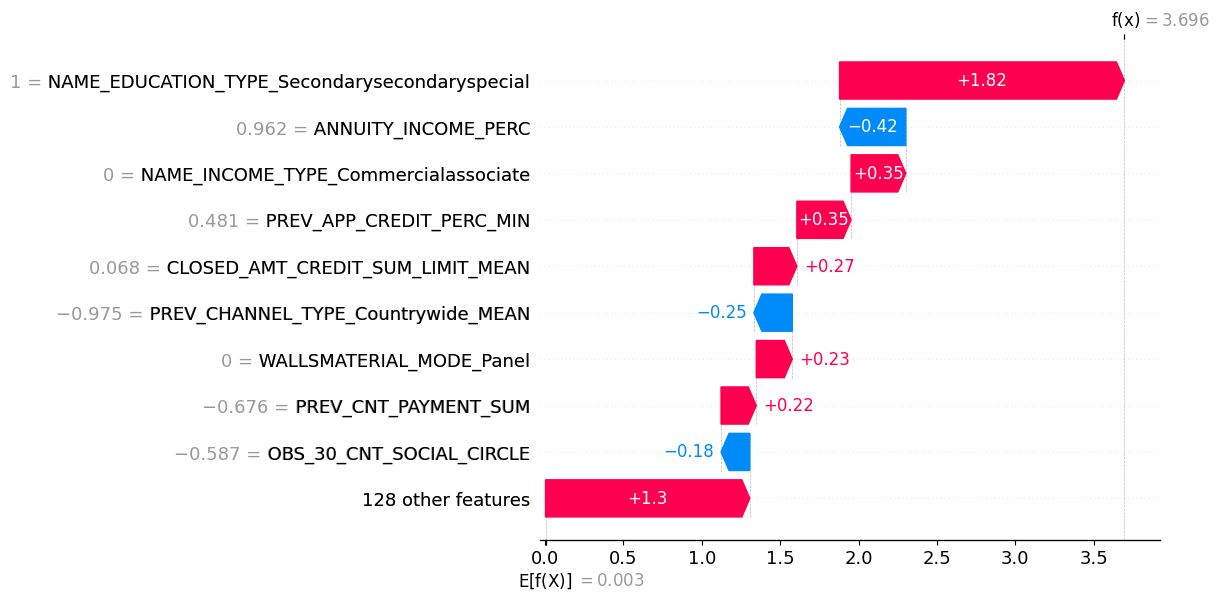

In [145]:
# Individu ID: 321072
shap.waterfall_plot(explainer_pipe(X_val_scaled)[1][:,1])

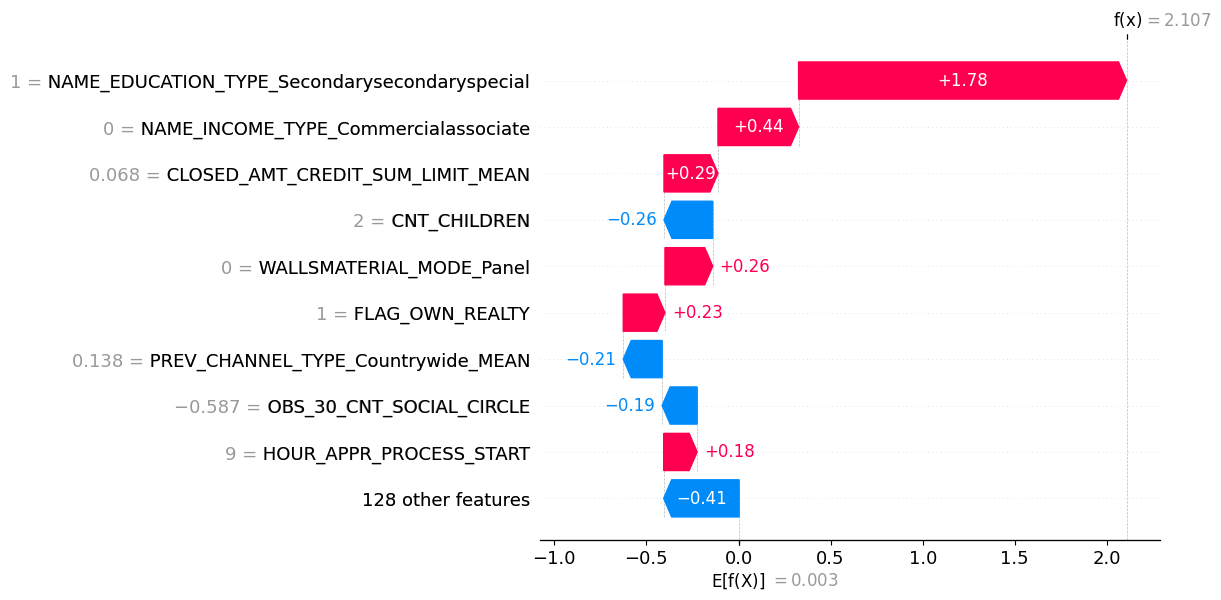

In [146]:
# Individu ID: 124755
shap.waterfall_plot(explainer_pipe(X_val_scaled)[2][:,1])

En se concentrant sur une observation spécifique, nous examinons comment chaque caractéristique influence la décision du modèle.

Les graphiques ci-dessus montrent comment les caractéristiques de l’individu sélectionné affectent la prédiction. Les caractéristiques en bleu ont une valeur SHAPley négative, ce qui signifie qu’elles diminuent la prédiction, tandis que celles en rouge ont une valeur SHAPley positive, augmentant ainsi la prédiction.

Prenons par exemple le client ID 284800. Les deux caractéristiques les plus déterminantes pour la prédiction de ce client sont celles que nous avons mentionnées précédemment. En revanche, pour le client 124755, la caractéristique la plus déterminante est DAYS_EMPLOYED, qui a une influence négative sur la prédiction pour ce client.

#### <font color = 'green'><u>*VI.4 - Data drift :* </u></font>

Le Data Drift fait référence à l'évolution des données réelles par rapport aux données utilisées pour tester et valider le modèle avant sa mise en production. La dimension temporelle est souvent une cause majeure de ce phénomène.

Le data drift peut impacter les performances d'un modèle de Machine Learning. Il existe plusieurs formes de drift. Par exemple, on peut observer des changements dans la distribution cible, ou un *covariate drift*, qui est un changement dans la distribution des données d'entrée (comme une variable qui acquiert une nouvelle catégorie).

Pour détecter le data drift, on utilise généralement des tests statistiques qui comparent la distribution des données de référence et des données actuelles (données de production). Si la différence entre ces deux distributions est significative, cela signifie qu'un drift a eu lieu. 
Pour un jeu de données volumineux (avec plus de 1 000 observations dans l'ensemble de données de référence), on utilise la Distance de Wasserstein pour les colonnes numériques (n_unique > 5), et la Divergence de Jensen--Shannon pour les colonnes catégorielles ou numériques (avec n_unique <= 5).

In [147]:
train_df = pd.read_csv('DATA_Home_Credit/application_train.csv')
test_df = pd.read_csv('DATA_Home_Credit/application_test.csv')

In [148]:
reference = app_train[:5000]
reference = reference.drop(['TARGET', 'SK_ID_CURR'], axis = 1)
current = app_test[:5000]

In [149]:
report = Report(metrics=[
    DataDriftPreset(), 
])

report.run(reference_data=reference, current_data=current)
report

On constate donc qu'il n'y a pas de data drift entre nos données de référence (données d'entrainement) et nos données actuelles (données de test), bien qu'un léger drift ait été détecté dans 9 de nos colonnes.

In [150]:
report.save_html('data_drift.html')